### **Saudi Arabia Used Cars**

[Sumber data Saudia Arabia Used Cars](https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Pasar mobil bekas di Arab Saudi terus mengalami pertumbuhan seiring dengan perubahan dinamika ekonomi dan preferensi konsumen. Dalam beberapa tahun terakhir, meningkatnya permintaan akan mobil bekas mencerminkan dorongan konsumen untuk memiliki kendaraan pribadi tanpa harus mengeluarkan biaya sepenuhnya untuk membeli mobil baru. Faktor-faktor seperti perubahan kondisi keuangan atau kebutuhan mobilitas sehari-hari dapat menjadi pendorong bagi konsumen untuk menjelajahi opsi mobil bekas.

**Problem Statement**

Dalam konteks dataset mobil bekas dari syarah.com, terdapat 5624 rekam data mobil bekas yang mencakup informasi tentang berbagai aspek. Tantangan utama yang dihadapi adalah kesulitan dalam menentukan harga yang optimal untuk mobil bekas. Faktor-faktor seperti jenis transmisi, tipe mobil, jarak tempuh, dan opsi tambahan dapat mempengaruhi harga yang juga menjadi variabel penting. Dalam konteks ini, perlu dikembangkan metode atau model yang dapat memberikan estimasi harga yang akurat dan transparan berdasarkan fitur-fitur mobil bekas yang terdapat dalam dataset, sehingga dapat meningkatkan kejelasan dalam proses jual-beli mobil bekas.

**Goals**

Berdasarkan tantangan penentuan harga optimal pada mobil bekas, diperlukan pengembangan alat atau model prediksi harga yang dapat membantu penjual untuk **menetapkan harga jual yang tepat untuk setiap mobil yang akan dijual**. Dengan mempertimbangkan variasi fitur pada setiap mobil, seperti kondisi mesin, tahun produksi, dan opsi tambahan, prediksi harga yang lebih akurat dapat meningkatkan potensi keuntungan bagi penjual dan tetap bersaing di pasar. Untuk platform mobil bekas, alat prediksi yang memberikan estimasi harga yang adil dapat meningkatkan jumlah penjual dan kendaraan yang terdaftar, yang pada akhirnya dapat meningkatkan pendapatan melalui biaya transaksi, baik dari penjual maupun pembeli.

**Analytic Approach**

Dalam tahap analisis ini, langkah awal dilakukan melalui eksplorasi data untuk mengungkap pola atau perbedaan di antara fitur-fitur yang ada. Proses eksplorasi ini bertujuan memberikan wawasan mendalam mengenai faktor-faktor yang berpotensi memengaruhi harga mobil bekas.

Setelah berhasil mengidentifikasi pola-pola tersebut, langkah selanjutnya adalah merancang dan membangun model regresi. Model ini berperan sebagai alat prediksi harga mobil bekas, dengan fokus utama pada mencegah harga yang terlalu tinggi (overpriced) atau terlalu rendah (underpriced). Pemanfaatan regresi memungkinkan kita untuk menemukan korelasi antara fitur-fitur spesifik dan harga, sehingga pengguna dapat memperoleh estimasi harga yang lebih akurat.

**Metric Evaluation**

Dalam membangun model machine learning ini, diperlukan beberapa evaluasi metrik sebagai berikut :
- RMSE      : Nilai rataan akar kuadrat dari error.
- MAE       : Rataan nilai absolut dari error.
- MAPE      : Rataan persentase error yang dihasilkan oleh suatu model regresi.
- R-Square  : Menjelaskan seberapa besar variasi nilai Y yang dapat dijelaskan oleh model.

Model akan semakin akurat dalam memprediksi harga suatu mobil bekas sesuai dengan limitasi fitur yang dipakai apabila nilai R-Square semakin mendekati nilai 1 dan nilai RMSE, MAE, dan MAPE yang dihasilkan semakin kecil.

### **Data Understanding**

- Dataset berisi catatan mobil bekas yang dikumpulkan dari syarah.com
- Setiap catatan mewakili satu mobil bekas, memberikan detail seperti nama merek, model, tahun pembuatan, asal, opsi, kapasitas mesin, jenis transmisi, jarak tempuh, harga di wilayah tertentu, dan status negosiasi.

**Attributes Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Type | Text | Jenis Mobil Bekas |
| Region | Text | Wilayah geografis tempat mobil bekas ditawarkan |
| Make | Text | Nama perusahaan yang memproduksu mobil |
| Gear_Type | Text | Ukuran jenis transmisi mobil |
| Origin | Text | Asal mobil bekas (Gulf / Saudi / Other) |
| Options | Text | Berbagai opsi yang tersedia pada mobil  (Full Options / Semi-Full / Standard) |
| Year | Int | Tahun pembuatan mobil |
| Engine_Size | Float | Ukuran mesin mobil |
| Mileage | Int | Jarak tempuh yang telah ditempuh mobil (dalam km) |
| Negotiable | Bool| Indikator biner (True/False) menunjukkan negosiasi, dengan True menandakan harga yang dapat dinegosiasikan (jika harga 0) |
| Price | Int | Harga yang tertera pada mobil (dalam Riyal) |

In [241]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [242]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Berdasarkan informasi di atas, terlihat bahwa dataset terdiri dari 11 kolom, yang terdiri dari 10 fitur dan 1 kolom target yaitu `price` dan juga merupakan variabel dependent. Dengan menggunakan set fitur tersebut, kita dapat memprediksi harga mobil bekas yang sesuai.

#### **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) adalah proses analisis data awal yang bertujuan untuk memahami karakteristik dasar dari suatu dataset. Tujuan utama EDA adalah untuk merumuskan hipotesis, mengidentifikasi pola, dan menemukan informasi tersembunyi atau anomali dalam data.

Berdasarkan informasi sebelumnya,  kolom `price` merupakan variabel target atau dependen dan kolom lainnya merupakan variabel independen. Dalam hal ini, variabel independent dibagi menjadid 2 variabel yaitu numerikal (Year, Engine_Size, Miliage, Price) dan kategorikal (Type, Region, Make, Gear_Type, Origin, Options, Negotiable). 


**Variabel Numerikal**

Untuk variabel berjenis numerik, kita dapat memperoleh wawasan dan memahami korelasi dengan memanfaatkan Pair Plot. Sebab, Pair Plot mampu menampilkan grafik pasangan untuk seluruh variabel numerik dalam daftar, memungkinkan kita untuk secara visual mengeksplorasi hubungan dan korelasi antar variabel numerik tersebut.

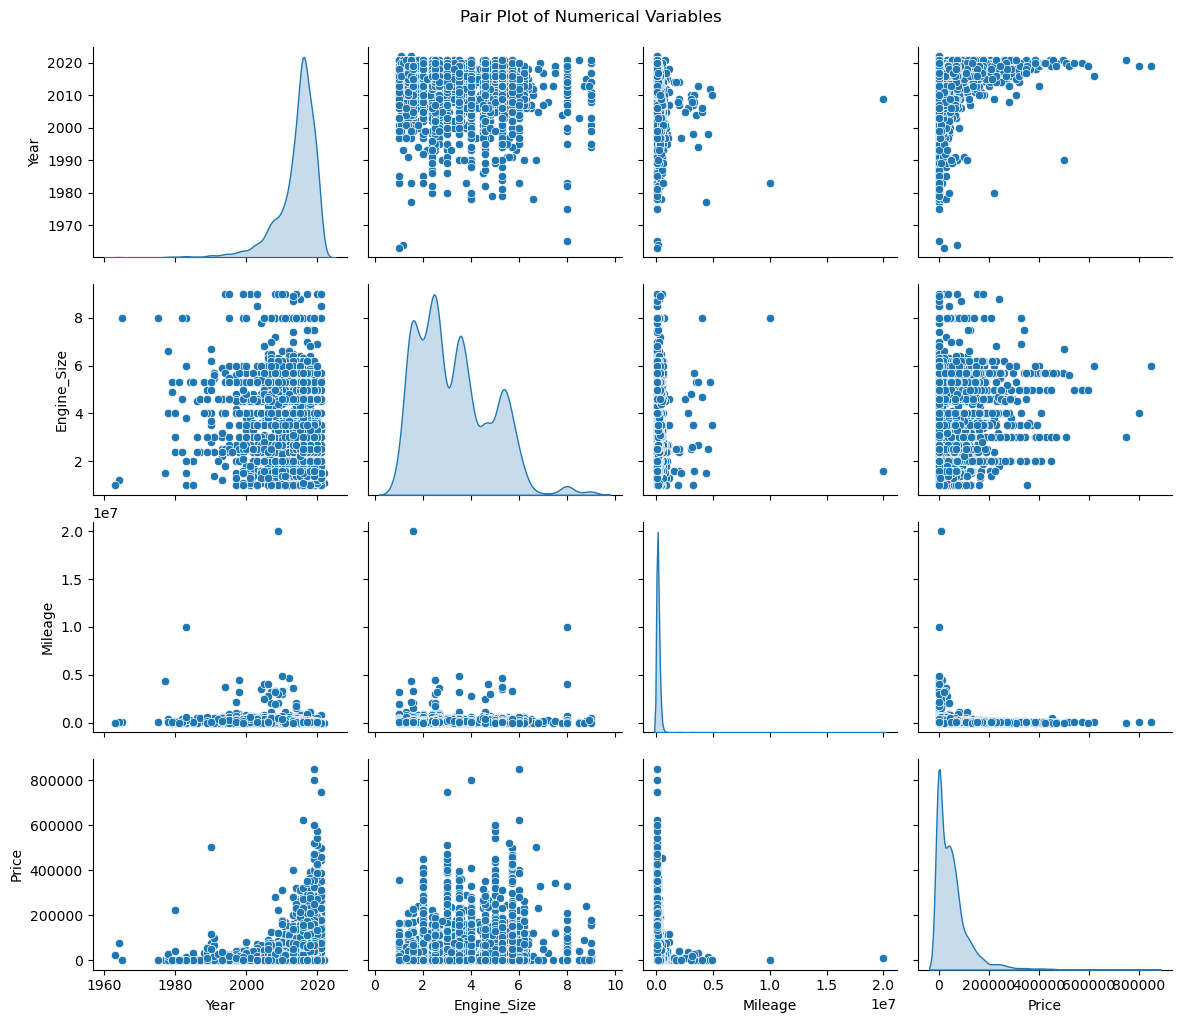

In [244]:
# Pairplot untuk variabel numerik
numerical_vars = ['Year', 'Engine_Size', 'Mileage', 'Price']
pair_plot = sns.pairplot(df[numerical_vars], aspect=1.2, diag_kind='kde') 
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.grid()
plt.show()


**Analisa:**

Dari grafik Pair Plot di atas, terlihat bahwa terdapat tingkat korelasi yang beragam antara variabel-variabel. Berikut adalah ringkasan korelasi antar variabel:

- **Year**: Korelasi Rendah dengan Engine_Size, sedangkan dengan Mileage dan Price Korelasinya Tinggi 
- **Engine_Size**: Korelasi Rendah dengan Year, Mileage dan Price.
- **Mileage**: Korelasi Tinggi dengan Year, Sedangkan pada Engine_Size dan Price Korelasinya Rendah.
- **Price**: Korelasi Tinggi dengan Year, Sedangkan pada  Engine_Size dan Mileage Korelasinya Rendah

**Variabel Kategorikal**

Pada variabel kategorikal, akan dilakukan analisis nilai di setiap kategori guna eksplorasi dan merangkum informasi terkait. Setelah itu, akan dilakukan penyusunan peringkat serta penghitungan frekuensi masing-masing nilai, sehingga dapat dilihat perusahaan mobil bekas yang paling sering muncul, jenis mobil bekas yang paling umum, wilayah dengan penggunaan mobil bekas tertinggi, asal mobil bekas, dan aspek lainnya.

In [245]:
import plotly.graph_objects as go
import plotly.express as px

**1. Pola Penyebaran Harga Mobil Bekas**

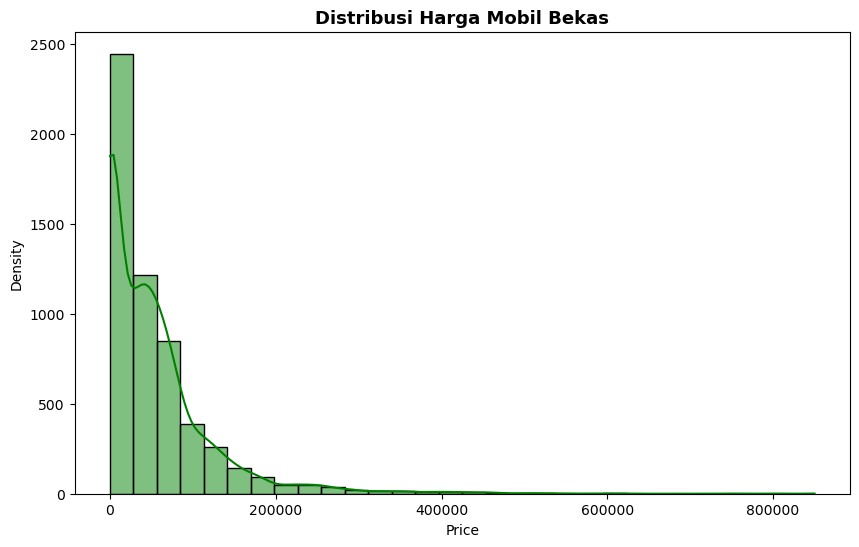

In [246]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='green')
plt.title('Distribusi Harga Mobil Bekas', weight='bold', size = 13)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [247]:
print(df.Price.describe())

count      5624.000000
mean      53074.058144
std       70155.340614
min           0.000000
25%           0.000000
50%       36500.000000
75%       72932.500000
max      850000.000000
Name: Price, dtype: float64


Berdasarkan visualisasi diatas, terlihat bahwa 
- Harga (`Price`) dari mobil bekas terindikasi right-skewed distribution dimana sebagian besar harga dalam dataset relatif rendah atau < 72392
- Dalam konteks distribusi ini, nilai-nilai yang lebih tinggi dari mean cenderung lebih jarang dan terletak di ekor sebelah kanan dari distribusi. Dapat diartikan juga sebagai postively skewed dimana mean (rata-rata) lebih besar dari median yaitu (53074 < 36500)

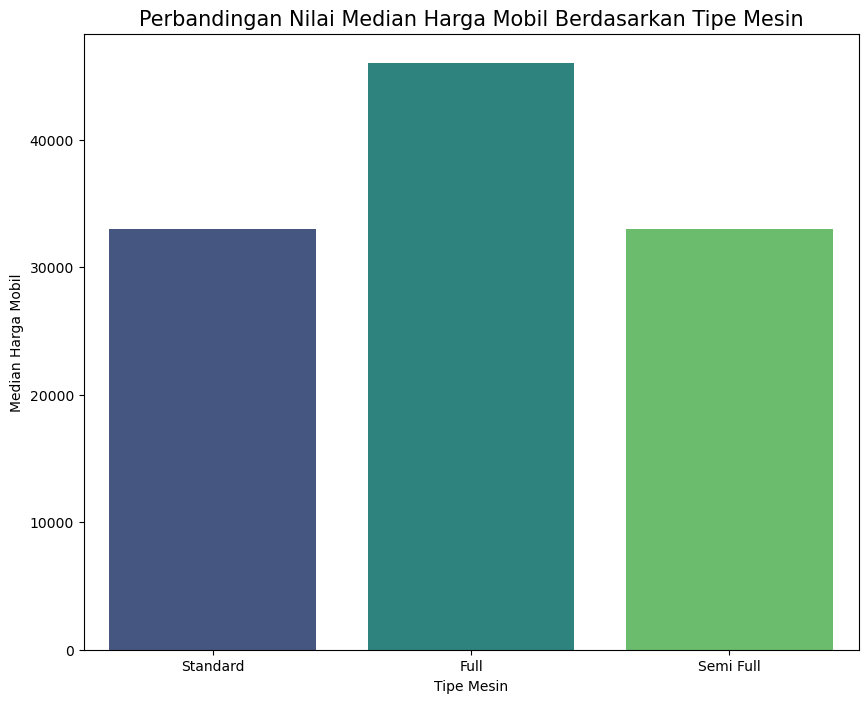

In [248]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Options', y='Price', data=df, estimator=np.median, ci=None, palette='viridis')
plt.title('Perbandingan Nilai Median Harga Mobil Berdasarkan Tipe Mesin', size=15)
plt.xlabel('Tipe Mesin')
plt.ylabel('Median Harga Mobil')
plt.show()

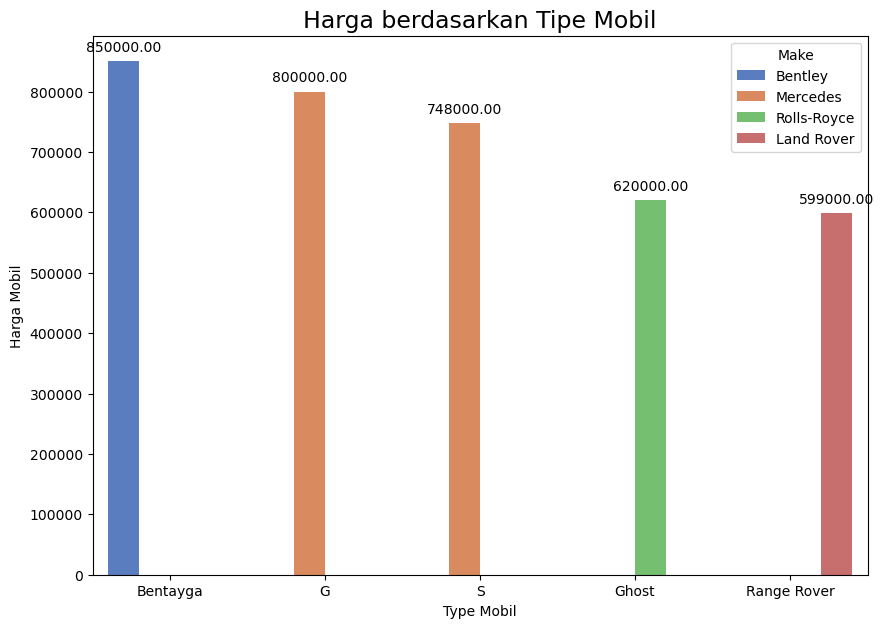

In [249]:
top_5_expensive_cars = df.nlargest(5,'Price')

plt.figure(figsize=(10, 7)) 
ax = sns.barplot(
    y='Price',
    x='Type',
    hue='Make',
    data=top_5_expensive_cars,
    palette='muted',
    width=0.8,   
    dodge=True,  
    ci=None     
)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Harga berdasarkan Tipe Mobil', size=17)
plt.xlabel('Type Mobil')
plt.ylabel('Harga Mobil')
plt.show()

<Figure size 1500x800 with 0 Axes>

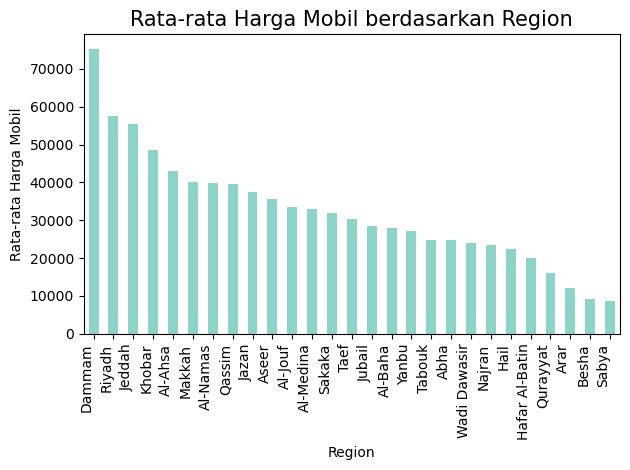

In [250]:
plt.figure(figsize=(15, 8))  

fig = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending=False))
fig.plot.bar(color=sns.color_palette('Set3', n_colors=len(fig)), legend=False)

plt.title('Rata-rata Harga Mobil berdasarkan Region', size=15)
plt.xlabel('Region')
plt.ylabel('Rata-rata Harga Mobil')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


**10 Perusahaan Merek Mobil Bekas Terpopuler**

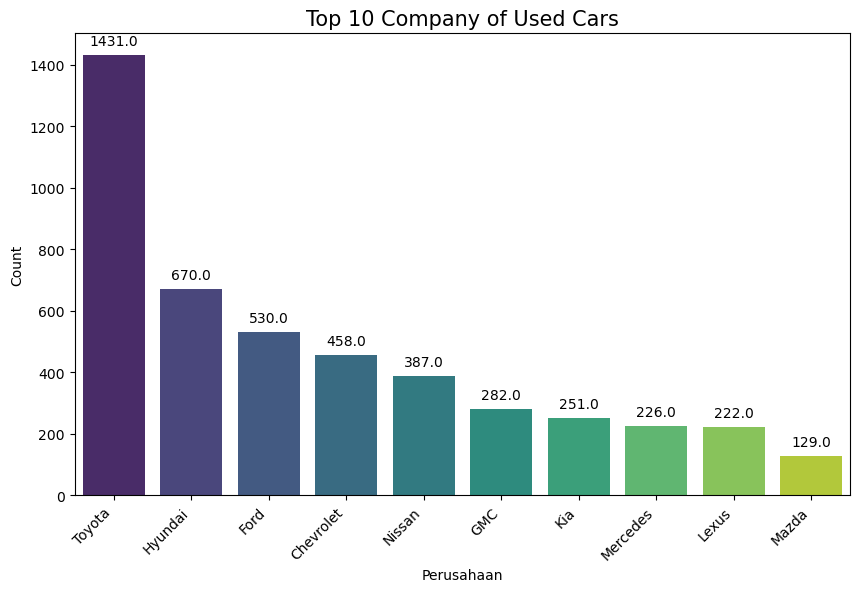

In [251]:
top_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Company of Used Cars', size=15)
plt.xlabel('Perusahaan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


**10 Jenis Mobil Bekas Terpopuler**

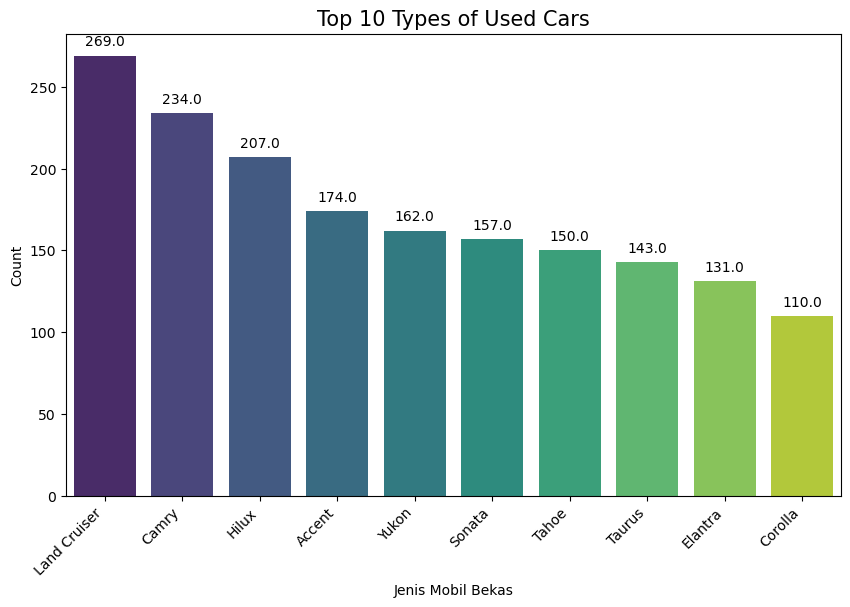

In [252]:
top_types = df['Type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bar_plot_types = sns.barplot(x=top_types.index, y=top_types.values, palette='viridis')
plt.title('Top 10 Types of Used Cars', size=15)
plt.xlabel('Jenis Mobil Bekas')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
for p in bar_plot_types.patches:
    bar_plot_types.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Beberapa visualisasi di atas menunjukkan bahwa Toyota menjadi pemimpin utama dalam kategori produsen mobil bekas, unggul dibandingkan dengan pesaing lainnya. Pada analisis 10 Jenis Mobil Bekas Teratas, sebagian besar diisi oleh varian Toyota seperti Land Cruiser, Camry, Hilux, dan Corolla. Sebagai tambahan, Hyundai juga memegang posisi penting sebagai produsen mobil bekas kedua terbanyak, dengan jenis mobil seperti Accent, Sonata, dan Elantra.

Dengan demikian, dapat disimpulkan bahwa hubungan yang kuat terlihat antara **Variabel Kategorikal** yakni, Merek dan Tipe mobil bekas, tercermin dari peringkat dan jenis mobil bekas yang mendominasi.

Selanjutnya mari kita lihat analisis terkait sebaran geografis mobil bekas dan membantu dalam mengidentifikasi tren terkait dengan wilayah penjualan dan asal usul mobil tersebut

**Top 10 Region of Used Cars & Origin of Used Cars**

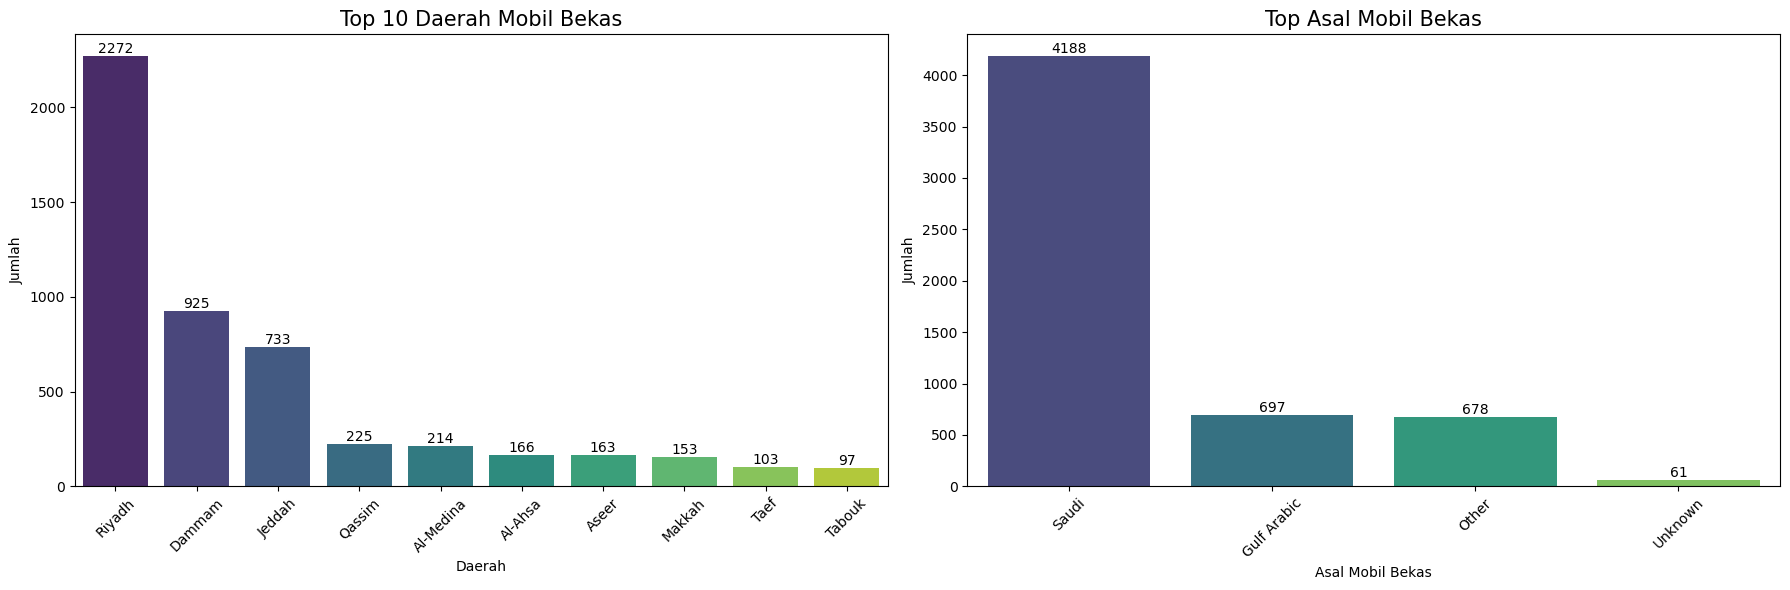

In [253]:
# Top 10 Region and Origin of Used Cars
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top 10 Region
top_regions = df['Region'].value_counts().head(10)
sns.barplot(x=top_regions.index, y=top_regions.values, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Daerah Mobil Bekas', size=15)
axes[0].set_xlabel('Daerah')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

for index, value in enumerate(top_regions.values):
    axes[0].text(index, value + 0.1, str(value), ha='center', va='bottom')

# Top 10 Origin
top_origins = df['Origin'].value_counts().head(10)
sns.barplot(x=top_origins.index, y=top_origins.values, palette='viridis', ax=axes[1])
axes[1].set_title('Top Asal Mobil Bekas', size=15)
axes[1].set_xlabel('Asal Mobil Bekas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

for index, value in enumerate(top_origins.values):
    axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dari hasil analisis, dapat disimpulkan bahwa Riyadh menempati posisi teratas sebagai wilayah dengan jumlah mobil bekas terbanyak, mencapai lebih dari 2000 unit. Sementara itu, Saudi Arabia menjadi negara asal mobil bekas terbanyak, dengan jumlah mencapai lebih dari 4000 unit. Terlihat adanya korelasi yang signifikan antara wilayah dan asal mobil bekas. 

Namun, perlu diperhatikan bahwa grafik ini melibatkan kategori beberapa kategori seperti (Unknown dan Other) pada asal mobil bekas. Keberadaan kategori tersebut mungkin memperkenalkan kompleksitas tambahan dalam analisis data. Oleh karena itu, langkah-langkah selanjutnya dapat mencakup pemahaman lebih mendalam atau pemrosesan data guna mengatasi potensi ketidakjelasan yang mungkin timbul.

**Type & Amount of Gear Type, Options & Negotiable on Used Cars**

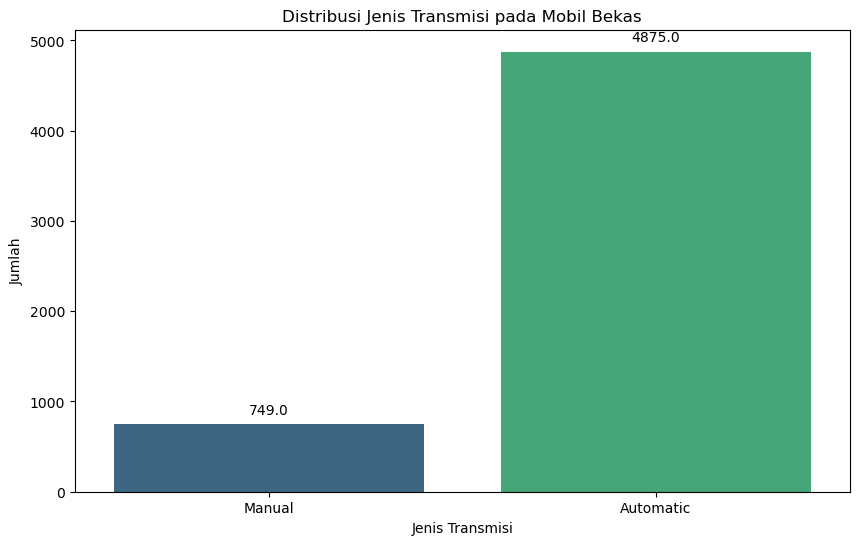

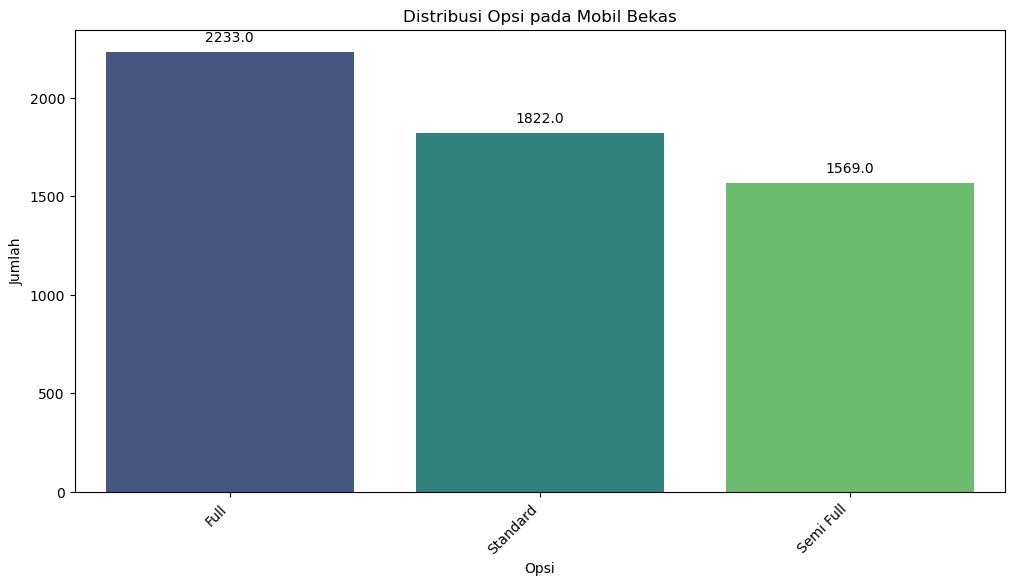

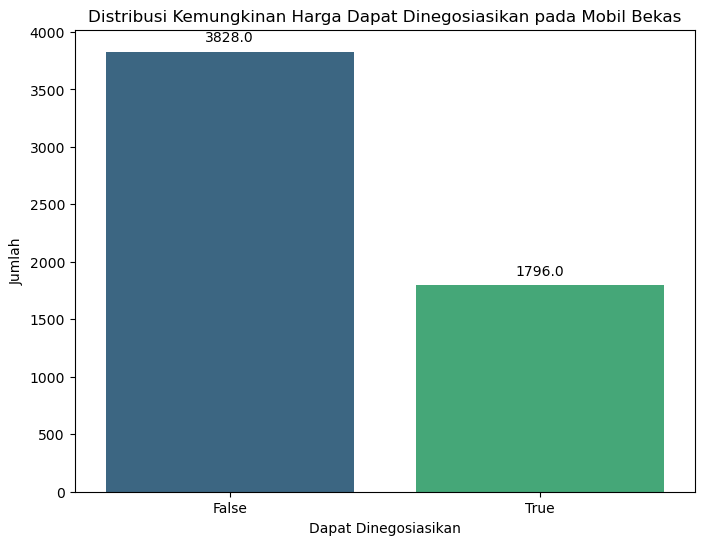

In [254]:
# Gear Type
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='Gear_Type', data=df, palette='viridis')
plt.title('Distribusi Jenis Transmisi pada Mobil Bekas')
plt.xlabel('Jenis Transmisi')
plt.ylabel('Jumlah')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Options
plt.figure(figsize=(12, 6))
ax2 = sns.countplot(x='Options', data=df, palette='viridis', order=df['Options'].value_counts().index)
plt.title('Distribusi Opsi pada Mobil Bekas')
plt.xlabel('Opsi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Negotiable
plt.figure(figsize=(8, 6))
ax3 = sns.countplot(x='Negotiable', data=df, palette='viridis')
plt.title('Distribusi Kemungkinan Harga Dapat Dinegosiasikan pada Mobil Bekas')
plt.xlabel('Dapat Dinegosiasikan')
plt.ylabel('Jumlah')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Berdasarkan data diatas, berikut adalah kesimpulan hasil analisanya :
- Mayoritas mobil bekas yang tersedia memiliki tipe gigi otomatis (Automatic) dibandingkan dengan tipe gigi manual.
- Terdapat tiga jenis Opsi pada Mobil Bekas, yaitu Full (2233), Standar (1822), dan Semi Full (1569). Terlihat bahwa opsi full memiliki jumlah yang lebih tinggi dibandingkan dengan 2 opsi lainnya.
- Sebagian besar mobil bekas yang tersedia tidak dapat dinegosiasikan (Non-Negotiable), sementara sebagian kecil dapat dinegosiasikan (Negotiable).

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.
- Mengubah data type yang belum sesuai

### Periksa detail dataset

In [255]:
# Membuat duplikasi dataframe
mobil_bekas = df.copy()

In [256]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Fluence, Town Car]"
1,Region,object,0,0.0,27,"[Jubail, Al-Baha]"
2,Make,object,0,0.0,58,"[Honda, Zhengzhou]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Other, Unknown]"
5,Options,object,0,0.0,3,"[Full, Standard]"
6,Year,int64,0,0.0,50,"[2009, 2019]"
7,Engine_Size,float64,0,0.0,71,"[6.2, 1.7]"
8,Mileage,int64,0,0.0,1716,"[380, 152750]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


#### Handling Missing Value and Data Duplikat

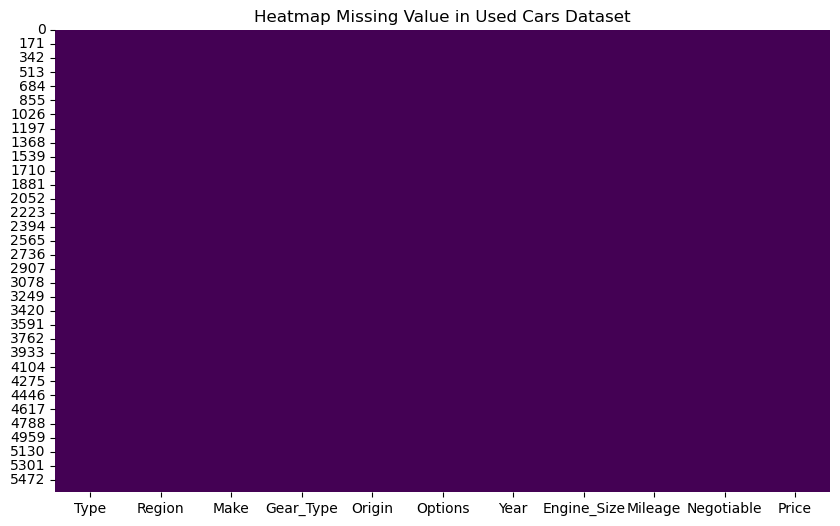

In [257]:
# Heatmap missing value
plt.figure(figsize=(10, 6))
sns.heatmap(mobil_bekas.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap Missing Value in Used Cars Dataset')
plt.show()

Berdasarkan heatmap diatas, terlihat bahwa tidak ada missing value dalam dataset. Selanjutnya, kita juga harus memeriksa adanya data duplikat dalam dataset. Duplikat berarti kita memiliki data yang berulang dalam dataset. Hal ini bisa disebabkan oleh kesalahan penginputan data atau metode pengumpulan data. Menghapus data duplikat akan membantu kita membuat observasi yang terbaik dari dataset yang kita miliki. Namun untuk melakukan penghapusan duplikat data perlu dilakukan pemeriksaan mendalam terlebih dahulu.

In [258]:
# Periksa jumlah data duplikat
duplicate_rows = mobil_bekas[mobil_bekas.duplicated()]
print("Jumlah data duplikat:", len(duplicate_rows))

# Periksa baris duplikat secara mendalam
duplicate_rows_details = mobil_bekas[mobil_bekas.duplicated(keep=False)]
print("Detail data duplikat:")
print(duplicate_rows_details)


Jumlah data duplikat: 4
Detail data duplikat:
        Type  Region     Make  Gear_Type Origin   Options  Year  Engine_Size  \
236   Sonata  Jeddah  Hyundai  Automatic  Saudi  Standard  2020          2.4   
540      Rio  Riyadh      Kia  Automatic  Saudi  Standard  2016          1.4   
953      Rio  Riyadh      Kia  Automatic  Saudi  Standard  2016          1.4   
2012  Tucson  Dammam  Hyundai  Automatic  Saudi  Standard  2016          2.0   
3631   Camry  Riyadh   Toyota  Automatic  Saudi      Full  2013          2.5   
4646  Sonata  Jeddah  Hyundai  Automatic  Saudi  Standard  2020          2.4   
4933  Tucson  Dammam  Hyundai  Automatic  Saudi  Standard  2016          2.0   
5267   Camry  Riyadh   Toyota  Automatic  Saudi      Full  2013          2.5   

      Mileage  Negotiable  Price  
236       100       False  72910  
540    270000       False  25000  
953    270000       False  25000  
2012   155000       False  45000  
3631   185000        True      0  
4646      100       Fal

Setelah memeriksa secara mendalam, kita dapat melihat bahwa terdapat 4 baris data yang duplikat, kolom Negotiable dan Price juga memiliki nilai yang sama untuk setiap baris duplikat. Oleh karena itu, dalam konteks ini, sepertinya memang beberapa baris ini adalah duplikat. Oleh karena itu, akan dilakukan penghapusan baris-baris duplikat ini dari dataset untuk mencegah duplikasi data yang tidak diinginkan.

In [259]:
#hapus data duplicate
mobil_bekas.drop_duplicates(inplace=True)

In [260]:
mobil_bekas.describe()

,Year,Engine_Size,Mileage,Price
count,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,2014.100356,3.296299,1.509222e+05,53086.404448
std,5.793003,1.515253,3.829633e+05,70175.153207
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


Berdasarkan informasi diatas, dapat diilihat bahwa :
- Kolom Price terlihat 25% memiliki nilai 0, dimana hal ini tidak mungkin jika sebuah harga jual mobil bekas gratis oleh pelanggan.
- Kolom Miliage dalam satuan mil memiliki nilai maximum sebesar 20000000 mil Jarak tempuh 20,000,000 mil setara dengan 32,186,880 kilometer. Besarnya jarak tempuh ini tidak masuk akal untuk sebagian besar kendaraan pribadi.

**Outliers**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

Meskipun tindakan ini dapat membawa manfaat, perlu diingat bahwa hal ini dapat mempengaruhi akurasi dan generalisasi model, terutama jika terdapat tren atau pola penting yang tidak terjangkau oleh batas atas tersebut. Oleh karena itu, sebaiknya dipertimbangkan pendekatan alternatif yang dapat menangani skewness dan outlier, seperti penggantian data atau penerapan teknik regresi yang lebih toleran terhadap outlier.

<Figure size 800x600 with 0 Axes>

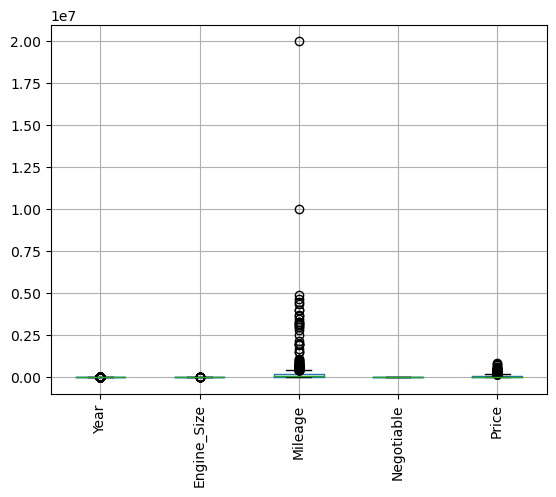

<Figure size 800x600 with 0 Axes>

In [261]:
# Check outliers using Plot boxplot
mobil_bekas.boxplot(rot=90)
plt.figure(figsize = (8,6))

Berdasarkan visualisasi diatas, terlihat beberapa outlier pada fitur `Mileage` dan `Price`. Untuk mengatasi ketidaksesuaian tersebut, dilakukan pemrosesan data menggunakan metode IQR dan pemahaman domain. Dengan langkah-langkah ini, model yang dibangun dapat memberikan prediksi yang lebih andal dengan mempertimbangkan batasan rentang yang telah ditetapkan dalam `clean dataset`. Hal ini bertujuan untuk menghasilkan prediksi yang lebih konsisten, terutama saat nilai yang diprediksi berada dalam rentang nilai yang telah ditentukan sebelumnya.

In [262]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

***Price***

In [263]:
# Outliers pada fitur price
find_anomalies(mobil_bekas['Price'])

IQR: 73000.0
limit_bawah: -109500.0
limit_atas: 182500.0


In [264]:
mobil_bekas['Price'].describe()

count      5620.000000
mean      53086.404448
std       70175.153207
min           0.000000
25%           0.000000
50%       36500.000000
75%       73000.000000
max      850000.000000
Name: Price, dtype: float64

In [265]:
# Cek price > 182500
mobil_bekas[mobil_bekas['Price'] > 182500].count()['Price']

261

In [266]:
# Cek price < 4000
mobil_bekas[mobil_bekas['Price'] < 4000 ].count()['Price']

1859

Berdasarkan data di atas, dan informasi [kisaran harga jual mobil bekas di Arab Saudi ](https://ksa.hatla2ee.com/en/car/used-prices), dapat disimpulkan bahwa :
- Harga sebuah mobil tidak terlihat normal dimana harga minimumnya adalah 0 yang mengindikasikan bahwa harga jual mobil tersebut gratis.
- Untuk mengurangi skew the result, akan dilakukan tindakan drop dengan ketentuan 4000 Riyal > Price >= 182500 Riyal

Text(0.5, 0, 'Range Selected Price')

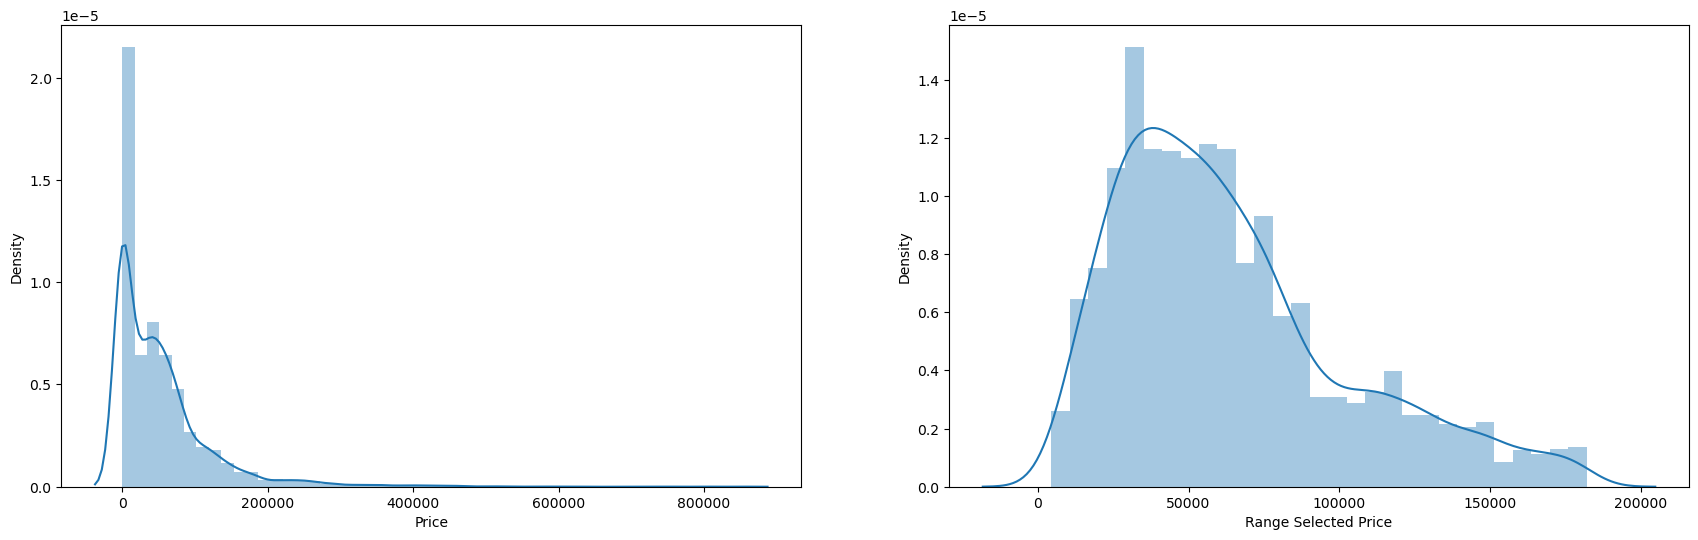

In [267]:
# Melakukan filtering pada data
mobil_bekas = mobil_bekas[(mobil_bekas['Price'] > 4000 ) & (mobil_bekas['Price'] <= 182500)]
4000
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(mobil_bekas['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

***Mileage***

In [268]:
# Outliers pada fitur Mileage
find_anomalies(mobil_bekas['Mileage'])

IQR: 137692.0
limit_bawah: -151538.0
limit_atas: 399230.0


In [269]:
mobil_bekas['Mileage'].describe()

count    3.497000e+03
mean     1.504958e+05
std      3.943418e+05
min      1.000000e+02
25%      5.500000e+04
50%      1.100000e+05
75%      1.926920e+05
max      2.000000e+07
Name: Mileage, dtype: float64

Pada *feature* ini kita akan melihat apakah ada nilai yang tidak masuk akal, masuk ke dalam datasets. Berdasarkan uraian tabel di atas, kita melihat terdapat nilai maksimum pada *feature* "Mileage" dengan nilai 20 juta. Hal ini tentu tidak masuk akal mengingat odometer dari sebuah mobil ketika mencapai jarak tempuh 999.999 KM akan kembali menjadi 0. Dan berdasarkan informasi [pasar jual beli mobi bekas di Arab Saudi](https://ksa.hatla2ee.com/en/car/search?orderbyKm=asc&page=67), range jarak tempuh dari mobil bekas adalah 1200 - 820.000 km, hal tersebut membuat miliage terlihat lebih real sehingga akan dilakukan handling data pada miliage.

In [270]:
# Cek Mileage > 820000
mobil_bekas[mobil_bekas['Mileage'] > 820000].count()['Mileage']

19

In [271]:
# Cek Mileage < 1200
mobil_bekas[mobil_bekas['Mileage'] < 1200].count()['Mileage']

279

Text(0.5, 0, 'Range Selected Mileage')

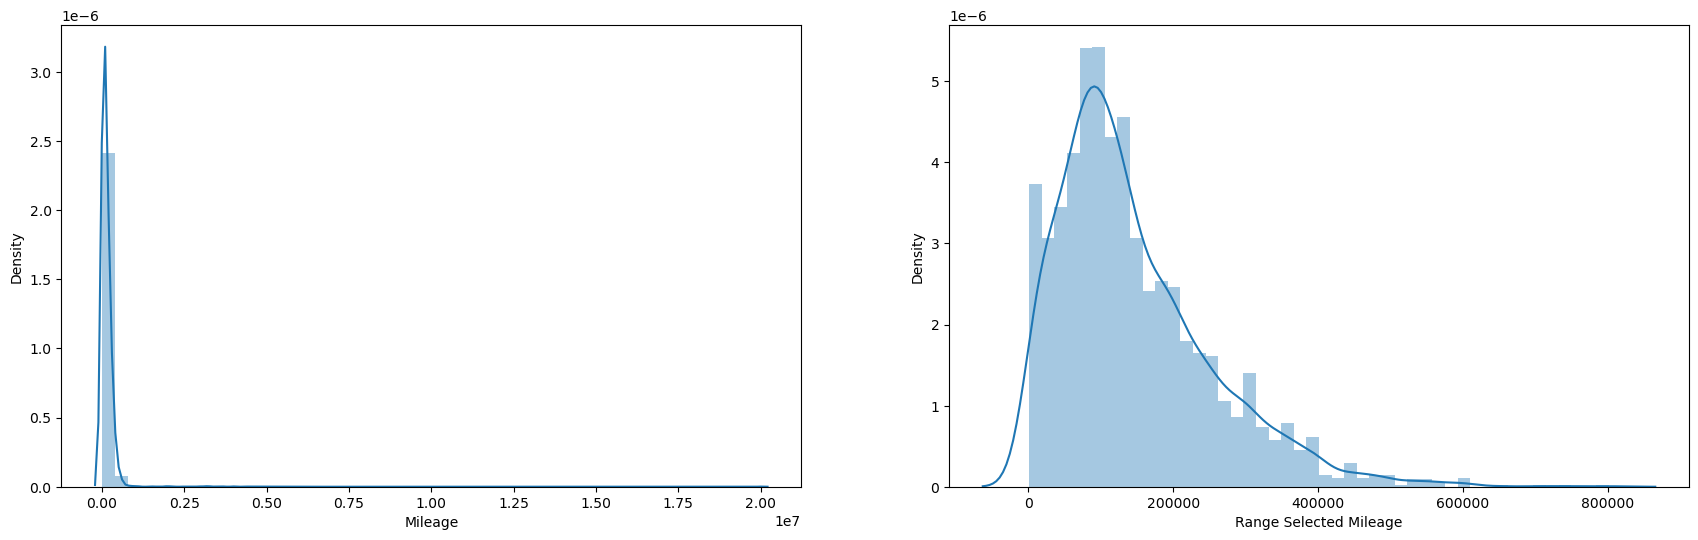

In [272]:
# Melakukan filtering pada data
mobil_bekas = mobil_bekas[(mobil_bekas['Mileage'] >= 1200) & (mobil_bekas['Mileage'] <= 820000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(mobil_bekas['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage')

***Year***

In [273]:
mobil_bekas['Year'].describe()

count    3199.000000
mean     2014.885589
std         4.828521
min      1964.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

In [274]:
find_anomalies(mobil_bekas['Year'])

IQR: 4.0
limit_bawah: 2008.0
limit_atas: 2024.0


In [275]:
# Asumsi penjualan mobil bekas biasa
mobil_bekas[mobil_bekas['Year'] < 2000].count()['Year']

50

In [276]:
mobil_bekas[mobil_bekas['Year'] > 2021].count()['Year']

0

In [277]:
min_year = df['Year'].min()
print("Tahun Paling Minimal:", min_year)

Tahun Paling Minimal: 1963


In [278]:
max_year = df['Year'].max()
print("Tahun Paling Maximal:", max_year)

Tahun Paling Maximal: 2022


- Jika kita melihat nilai maksimum, terlihat bahwa tahunnya adalah 2021, namun terdapat anomali dengan tahun 2022.
- Mengingat peraturan pemerintah Saudi Arabia, mobil bekas yang diperbolehkan adalah yang berusia kurang dari 7 tahun, namun hal ini dapat mengakibatkan kehilangan banyak data.
- Selain itu, kita berasumsi bahwa mobil yang dijual adalah mobil biasa, dan bukanlah mobil clasic.

Dengan mempertimbangkan ketiga hal tersebut, kita membatasi tahun mobil dengan rentang 2000 hingga 2021.

Text(0.5, 0, 'Range Selected Year')

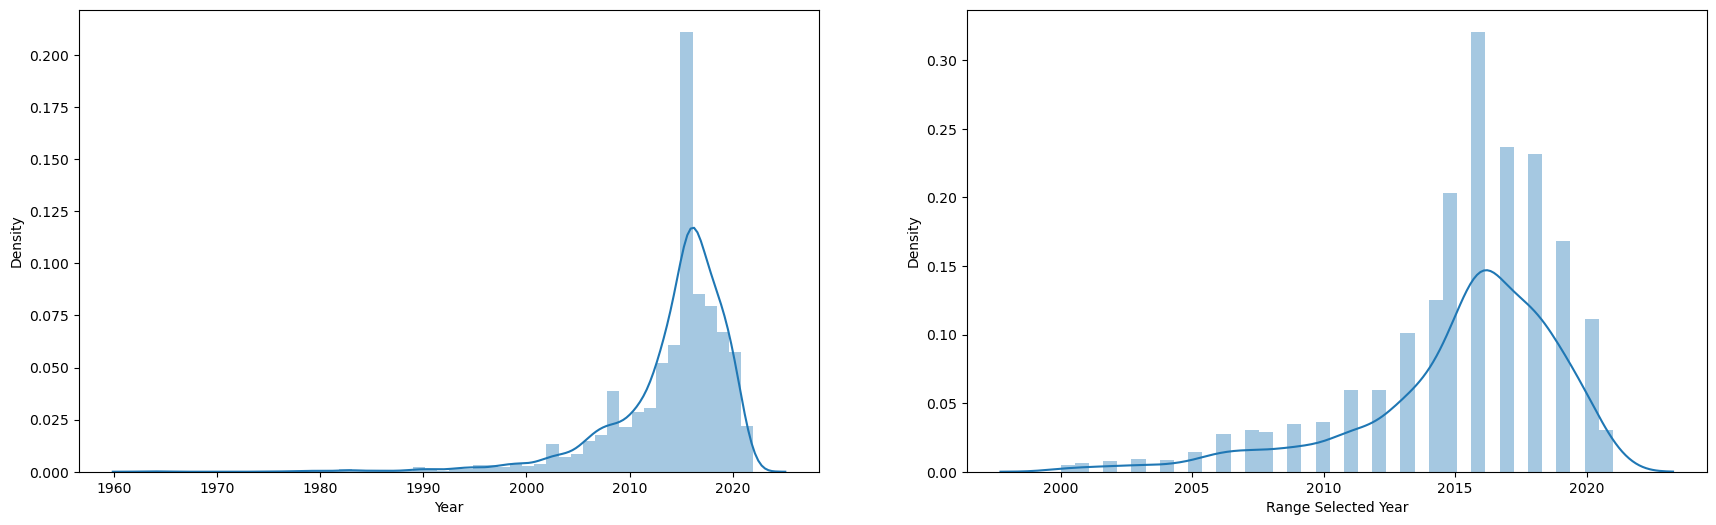

In [279]:
# Melakukan filtering pada data
mobil_bekas = mobil_bekas[(mobil_bekas['Year'] >= 2000) & (mobil_bekas['Year'] <= 2021)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(mobil_bekas['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year')

***Engine Size***

In [280]:
mobil_bekas['Engine_Size'].describe()

count    3149.000000
mean        3.077390
std         1.416515
min         1.000000
25%         2.000000
50%         2.700000
75%         3.800000
max         9.000000
Name: Engine_Size, dtype: float64

In [281]:
find_anomalies(mobil_bekas['Engine_Size'])

IQR: 1.7999999999999998
limit_bawah: -0.6999999999999997
limit_atas: 6.5


In [282]:
# Memeriksa Apakah Terdapat Nilai 'Engine_Size' > 6.5
mobil_bekas[mobil_bekas['Engine_Size'] > 6.5].count()['Engine_Size']

22

Distribusi data pada kolom 'Engine_Size' menunjukkan bahwa 75% dari nilai berada di bawah 3.8, sementara nilai maksimum mencapai 9. Terdapat kecenderungan distribusi data yang miring ke kanan (positive skewness). Sebanyak 21 titik data memiliki 'Engine_Size' lebih dari 6.5, yang melebihi batas atas berdasarkan metode IQR. Dengan mempertimbangkan hal ini, titik data dengan 'Engine_Size' lebih besar dari 6.5 akan dihapus dari pemodelan untuk mengurangi kemiringan distribusi. 

Text(0.5, 0, 'Range Selected Engine_Size')

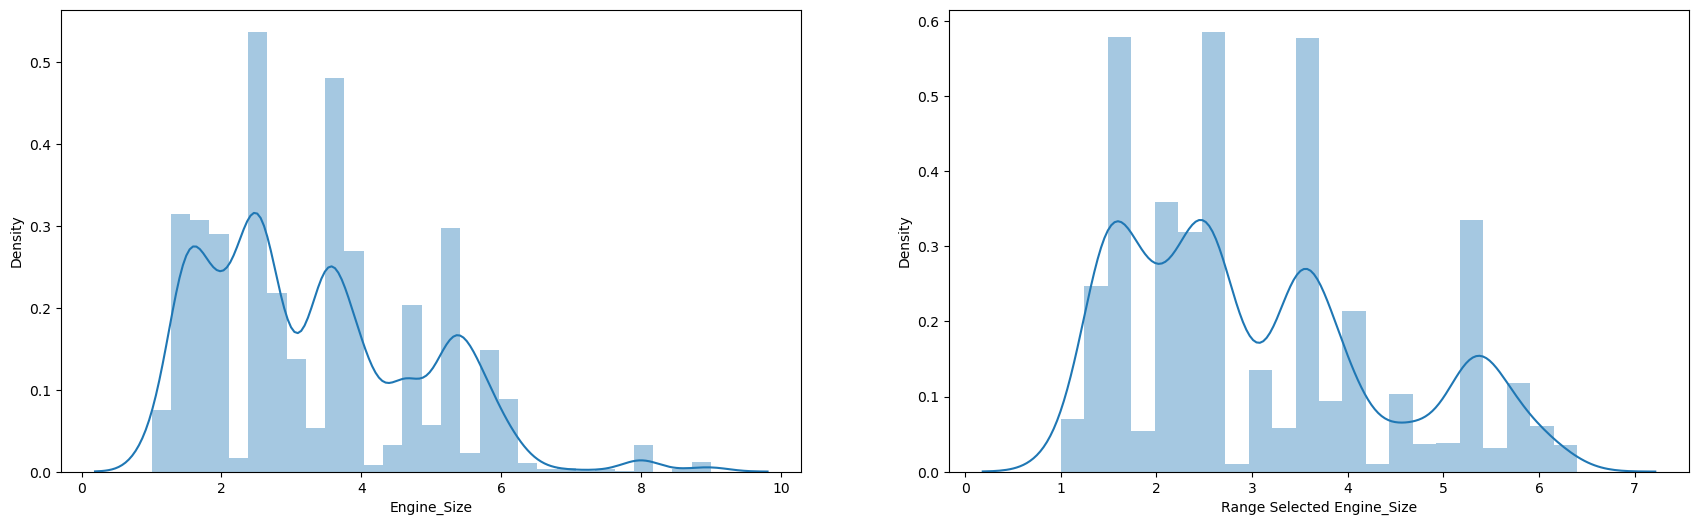

In [283]:
# Melakukan filtering pada data
mobil_bekas = mobil_bekas[(mobil_bekas['Engine_Size'] <=6.5)]
                          
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Engine_Size'], ax=axes[0])
sns.distplot(mobil_bekas['Engine_Size'], ax=axes[1])
axes[0].set_xlabel('Engine_Size')
axes[1].set_xlabel('Range Selected Engine_Size')

#### Dropping irrelevant columns / feature selection

Dalam menganalisa nanti, kita perlu menghapus kolom mana saja yang tidak diperlukan berdasarkan domain knowledge yang dimiliki.

**Drop Feature `Negotiable`**

In [284]:
# Melihat korelasi antara fitur 'Negotiable' dan target 'Price'
correlation_negotiable = mobil_bekas[['Negotiable', 'Price']].corr()

# Output nilai korelasi
print("Korelasi antara Negotiable dan Price:", correlation_negotiable.loc['Negotiable', 'Price'])


Korelasi antara Negotiable dan Price: nan


Kolom "Negotiable" akan dihapus karena kemungkinan dianggap tidak relevan atau kurang berkontribusi pada pemahaman dan prediksi harga mobil bekas. Korelasi antara fitur "Negotiable" dan target "Price" menunjukkan nilai NaN, yang menandakan bahwa tidak ada korelasi linear yang terukur antara keduanya. Namun, terdapat observasi bahwa nilai "Price" yang harganya 0 dikarenakan fitur `Negotiable` yang bernilai *True*. Hal ini menunjukkan bahwa harga mobil tersebut ditentukan melalui negosiasi, yang dapat mengakibatkan ketidakpastian dalam harga mobil bekas. Oleh karena itu, untuk memastikan analisis yang lebih objektif, kita akan menghapus fitur `Negotiable` dari dataset.

In [285]:
mobil_bekas.drop('Negotiable', axis=1, inplace=True)

**Drop Feature `Origin`**

Berdasarkan [informasi ini](https://www.kenresearch.com/blog/2020/09/future-of-saudi-arabia-used-car-market-growth-rate-ken-research/), parameter negara pengimpor mobil tidak berpengaruh pada penjualan mobil bekas di Arab Saudi. Maka Feature `origin` akan dilakukan tindakan penghapusan.

In [286]:
mobil_bekas.drop('Origin', axis=1, inplace=True)

**Data Correlation**

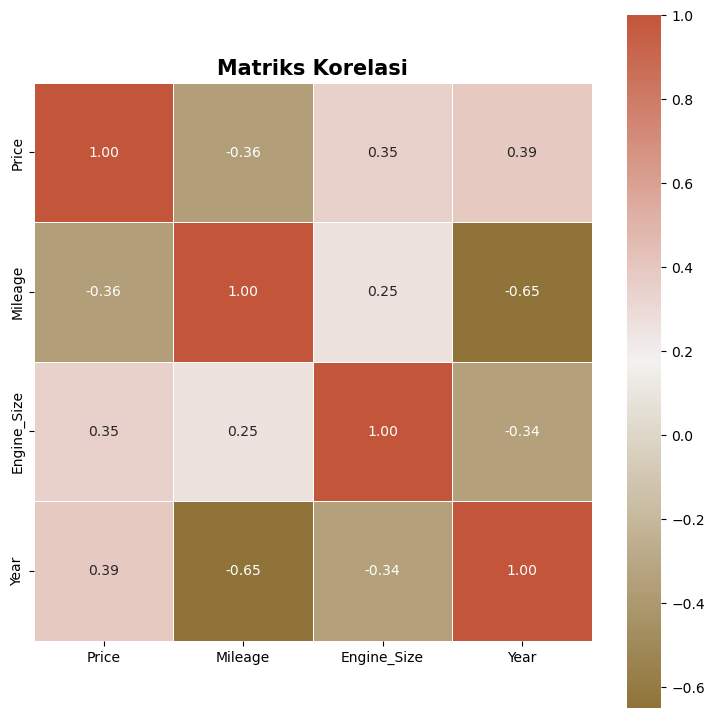

In [287]:
plt.figure(figsize=(9, 9))
palette = sns.diverging_palette(60, 20, as_cmap=True)
corr = mobil_bekas[['Price', 'Mileage', 'Engine_Size', 'Year']].corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Matriks Korelasi', size=15, weight='bold')
plt.show()



Berdasarkan matriks korelasi, kita dapat menyimpulkan bahwa tidak ada fitur yang memiliki korelasi yang signifikan dengan fitur Price. Korelasi tertinggi terjadi antara fitur Year dengan Price. Secara umum, nilai korelasi cenderung positif, namun pada fitur Mileage, korelasinya memiliki arah yang berlawanan.

In [288]:
# Fungsi untuk menghitung VIF
def calculate_vif(X):
    return pd.DataFrame({'Feature': X.columns, 
                         'VIF': np.diagonal(np.linalg.inv(X.corr().values))})

# Hitung VIF
vif_result = calculate_vif(mobil_bekas[['Year', 'Engine_Size', 'Mileage', 'Price']])

# Tampilkan hasil VIF
print("Variance Inflation Factor (VIF):")
print(vif_result)


Variance Inflation Factor (VIF):
       Feature       VIF
0         Year  2.201981
1  Engine_Size  1.678932
2      Mileage  1.814393
3        Price  1.787581


Berdasarkan hasil Variance Inflation Factor (VIF), disimpulkan bahwa tidak terdapat indikasi signifikan dari multicollinearity antara variabel "Year", "Engine_Size", "Mileage", dan "Price" dalam model. Semua fitur memiliki nilai VIF di bawah 5, menunjukkan tidak adanya masalah multicollinearity yang signifikan. Oleh karena itu, fitur-fitur tersebut dapat dimasukkan ke dalam model tanpa kekhawatiran tentang masalah multicollinearity.

Sebelum memulai proses pemodelan, penting untuk memastikan bahwa data yang digunakan sudah bersih. Langkah selanjutnya adalah memilih metode yang diharapkan dapat meningkatkan kinerja model machine learning yang akan dibangun. Perlu diingat bahwa *Garbage in, garbage out*, yang berarti hasil yang diperoleh dari model akan bergantung pada kualitas data yang digunakan sebagai masukan.

In [289]:
mobil_bekas.reset_index(drop = True, inplace = True)
mobil_bekas

,Type,Region,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
0,Optima,Hafar Al-Batin,Kia,Automatic,Semi Full,2015,2.4,220000,42000
1,CX3,Abha,Mazda,Automatic,Semi Full,2019,2.0,25000,58000
2,Cayenne S,Riyadh,Porsche,Automatic,Full,2012,4.8,189000,85000
3,Avalon,Riyadh,Toyota,Automatic,Standard,2016,3.5,110864,81500
4,Land Cruiser,Riyadh,Toyota,Automatic,Full,2011,4.6,79000,145000
...,...,...,...,...,...,...,...,...,...
3122,CX9,Qassim,Mazda,Automatic,Full,2020,2.0,9500,132000
3123,Suburban,Riyadh,GMC,Automatic,Full,2006,5.3,86000,50000
3124,X-Trail,Jeddah,Nissan,Automatic,Standard,2018,2.5,78794,68000
3125,Yukon,Dammam,GMC,Automatic,Full,2016,5.3,48000,145000


In [290]:
mobil_bekas.describe()

,Year,Engine_Size,Mileage,Price
count,3127.000000,3127.000000,3127.000000,3127.000000
mean,2015.265430,3.042821,143704.576271,66049.022386
std,3.805647,1.359022,105072.069437,38707.426731
min,2000.000000,1.000000,1200.000000,4500.000000
25%,2014.000000,2.000000,70360.500000,37000.000000
50%,2016.000000,2.700000,119000.000000,57500.000000
75%,2018.000000,3.800000,198000.000000,85000.000000
max,2021.000000,6.400000,801500.000000,182000.000000


In [291]:
mobil_bekas.shape

(3127, 9)

Berdasarkan Proses Feature Engineering sesuai dengan asumsi dan argumen yang diberikan. Dataset tersisa 3127 baris data dan 9 column yang akan digunakan dalam membangun model.

### **Modeling**

Pada tahapan ini akan digunakan 3 base model dan 3 ensamble model yang akan dipertimbangkan. Model tersebut adalah sebagai berikut :
- **Base Model** (Linier Regression, KNN, Desicion Tree)
- **Ensamble Model** (Random Forest Regression, Gradient Boosting Regression, Xtreme Gradient Boosting Regessor)


In [292]:
pip install scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [293]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, get_scorer_names, mean_squared_log_error


**Encoding**

Berdasarkan data yang tersedia, terdapat 5 variabel kategorikal yang perlu diubah menjadi numerikal agar dapat dimanfaatkan dalam pembuatan model. Dalam pemilihan metode encoding, kita mempertimbangkan sifat fitur-fitur tersebut seperti sebagai berikut :

1. One-Hot Encoding untuk variabel `Gear_Type` karena memiliki nilai unik yang berbeda namun tidak memiliki urutan hierarki.  
2. Ordinal Encoding untuk variabel `Options`,  karena nilai-nilainya memiliki tingkatan atau tingkat hierarki yang dapat diurutkan, seperti 'Standard' mungkin merupakan opsi yang lebih dasar atau standar daripada 'Semi Full' dan 'Full'. 
3. Binary Encoding lebih cocok digunakan untuk variabel `Type`, `Region`, dan `Make` karena memiliki nilai unik yang beragam dan tidak memiliki hubungan ordinal yang dapat diurutkan.

Dengan demikian, kita dapat menggunakan ColumnTransformer untuk mengaplikasikan transformasi encoding ke variabel-variabel tersebut, sehingga nantinya dapat diintegrasikan ke dalam pipeline model.

In [294]:
# Mengubah fitur kategorikal menjadi numerikal
ctrans = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type']),
    ('Ordinal', OrdinalEncoder(categories=[['Standard', 'Semi Full', 'Full']]), ['Options']),
    ('Binary', BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')


**Train and Test Splitting**

Splitting Data Train 70 : Data Test 30

In [295]:
# Splitting data into training and test with propotion 70:30
X = mobil_bekas.drop(['Price'], axis=1)
y = mobil_bekas['Price']
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=100)

**Choose a Benchmark Model**

Data Train

In [296]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state = 100)
rf = RandomForestRegressor(random_state = 100)
gdt = GradientBoostingRegressor(random_state = 100)
xgb = XGBRegressor(random_state = 100)

ttr_lr = TransformedTargetRegressor(lr, func = np.log, inverse_func = np.exp)
ttr_knn = TransformedTargetRegressor(knn, func = np.log, inverse_func = np.exp)
ttr_dt = TransformedTargetRegressor(dt, func = np.log, inverse_func = np.exp)
ttr_rf = TransformedTargetRegressor(rf, func = np.log, inverse_func = np.exp)
ttr_gdt = TransformedTargetRegressor(gdt, func = np.log, inverse_func = np.exp)
ttr_xgb = TransformedTargetRegressor(xgb, func = np.log, inverse_func = np.exp)

models = [ttr_lr, ttr_knn, ttr_dt, ttr_rf, ttr_gdt, ttr_xgb]

score_mae = []
score_mape = []
score_rmsle = []
score_r2 = []

for model in models:
    
    cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
    estimator = Pipeline([
        ('preprocessing', ctrans),
        ('model', model)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = cross_val, 
        scoring = 'neg_mean_absolute_error', 
        error_score = 'raise'
        )

    score_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = cross_val, 
        scoring = 'neg_mean_absolute_percentage_error', 
        error_score = 'raise'
        )

    score_mape.append(model_cv_mape.mean())
    
       # RMSLE
    model_cv_rmsle = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = cross_val, 
        scoring = 'neg_mean_squared_log_error', 
        error_score = 'raise'
        )

    score_rmsle.append(model_cv_rmsle.mean())

       # R2
    model_cv_r2  =  cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = cross_val, 
        scoring = 'r2', 
        error_score = 'raise'
        )

    score_r2.append(model_cv_r2.mean())

score_rmsle = np.sqrt(abs(np.array(score_rmsle)))

In [297]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
Model_name = ['Linear Regression', 'KNN Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boost Regression','Extreme Gradient Boost']

train_score = pd.DataFrame({'Model': Model_name,
                            'Score MAE': score_mae,
                            'Score MAPE': score_mape,
                            'Score RMSLE': score_rmsle,
                            'Score R2': score_r2
                            })

train_score

,Model,Score MAE,Score MAPE,Score RMSLE,Score R2
0,Linear Regression,-17417.852401,-0.300669,0.375068,0.557601
1,KNN Regression,-28126.380312,-0.562909,0.595519,0.028575
2,Decision Tree Regression,-17458.407233,-0.318720,0.424684,0.454156
3,Random Forest Regression,-12341.039593,-0.217745,0.299469,0.738524
4,Gradient Boost Regression,-13567.761889,-0.231985,0.304124,0.711643
5,Extreme Gradient Boost,-11493.502168,-0.206286,0.282034,0.785796


#### Analisa

Berdasarkan skor evaluasi yang diberikan, model-model yang dievaluasi memiliki performa yang berbeda-beda. Berikut adalah analisis singkat tentang performa masing-masing model:

1. **Linear Regression**:
   - Score MAE (-17417.852401) dan Score MAPE (-0.300669) menunjukkan tingkat kesalahan yang tinggi dan kemungkinan adanya overfitting.
   - Score RMSLE (0.375068) dan Score R2 (0.557601) menunjukkan kinerja yang moderat.

2. **KNN Regression**:
   - Score MAE (-28126.380312) dan Score MAPE (-0.562909) menunjukkan tingkat kesalahan yang sangat tinggi.
   - Score RMSLE (0.595519) dan Score R2 (0.028575) menunjukkan kinerja yang rendah dan kemungkinan adanya underfitting.

3. **Decision Tree Regression**:
   - Score MAE (-17458.407233) dan Score MAPE (-0.318720) menunjukkan tingkat kesalahan yang moderat.
   - Score RMSLE (0.424684) dan Score R2 (0.454156) menunjukkan kinerja yang cukup baik, meskipun tidak optimal.

4. **Random Forest Regression**:
   - Score MAE (-12341.039593) dan Score MAPE (-0.217745) menunjukkan tingkat kesalahan yang lebih rendah dibandingkan dengan model lainnya.
   - Score RMSLE (0.299469) dan Score R2 (0.738524) menunjukkan kinerja yang baik, menandakan model ini mungkin menjadi pilihan terbaik.

5. **Gradient Boost Regression**:
   - Score MAE (-13567.761889) dan Score MAPE (-0.231985) menunjukkan tingkat kesalahan yang rendah.
   - Score RMSLE (0.304124) dan Score R2 (0.711643) menunjukkan kinerja yang hampir sebanding dengan Random Forest Regression.

6. **Extreme Gradient Boost**:
   - Score MAE (-11493.502168) dan Score MAPE (-0.206286) menunjukkan tingkat kesalahan yang rendah, bahkan sedikit lebih baik dari Random Forest Regression.
   - Score RMSLE (0.282034) dan Score R2 (0.785796) menunjukkan kinerja yang sangat baik, sehingga model ini mungkin menjadi pilihan terbaik.

Berdasarkan analisis ini, model Extreme Gradient Boost memiliki kinerja terbaik dengan skor evaluasi yang lebih rendah dan nilai R2 yang lebih tinggi, menunjukkan kemampuan yang lebih baik dalam menjelaskan variasi dalam data target.

Selanjutnya, Extreme Gradient Boost akan dilakukan benchmark serta akan dilakukan prediksi pada data baru atau test set.

#### **Extreme Gradient Boost**
Extreme Gradient Boosting (XGBoost) adalah algoritma machine learning yang merupakan pengembangan dari Gradient Boosting Machine (GBM). XGBoost menggunakan teknik ensemble learning untuk meningkatkan kinerja model prediksi. Algoritma ini bekerja dengan cara menggabungkan beberapa model prediksi yang lemah (weak learners) menjadi satu model yang lebih kuat (strong learner).

XGBoost memiliki beberapa keunggulan, antara lain:
1. **Skalabilitas**: XGBoost dapat diimplementasikan pada dataset yang besar dengan cepat dan efisien.
2. **Regularisasi**: Algoritma ini memiliki mekanisme regularisasi yang dapat mengurangi overfitting.
3. **Penanganan Missing Values**: XGBoost dapat menangani missing values secara otomatis.
4. **Penanganan Variabel Kategorikal**: XGBoost dapat menangani variabel kategorikal tanpa perlu melakukan encoding terlebih dahulu.
5. **Performa yang Tinggi**: XGBoost sering kali memberikan hasil yang lebih baik dibandingkan dengan algoritma machine learning lainnya.

XGBoost juga memiliki beberapa parameter yang dapat diatur untuk meningkatkan kinerja model, seperti learning rate, jumlah pohon (n_estimators), kedalaman pohon (max_depth), dan lain-lain.

In [298]:
ttr_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = {
    'Extreme Gradient Boost Test': ttr_xgb,
}

score_mae_test = []
score_mape_test = []
score_rmsle_test = []
score_r2_test = []

for i in models:

    model = Pipeline([
        ('preprocessing', ctrans),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae_test.append(mean_absolute_error(y_test, y_pred))
    score_mape_test.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmsle_test.append(mean_squared_log_error(y_test, y_pred, squared = False))
    score_r2_test.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'Score MAE': score_mae_test, 
                                    'Score MAPE': score_mape_test, 
                                    'Score RMSLE': score_rmsle_test,  
                                    'Score R2': score_r2_test}, 
                                    index=models.keys())
score_before_tuning

,Score MAE,Score MAPE,Score RMSLE,Score R2
Extreme Gradient Boost Test,11644.740352,0.208043,0.278286,0.804368


**Perbandingan Nilai Train dan Test**

In [299]:
hasil_train = train_score[5:6].set_index('Model', drop = True)
merged = pd.concat([hasil_train, score_before_tuning])
merged.reset_index(inplace=True)
merged.drop(columns = 'index', inplace = True)
merged["Model"] = ['Extreme Gradient Boost Train', 'Extreme Gradient Boost Test']
merged.set_index('Model', drop = True)

,Score MAE,Score MAPE,Score RMSLE,Score R2
Model,,,,
Extreme Gradient Boost Train,-11493.502168,-0.206286,0.282034,0.785796
Extreme Gradient Boost Test,11644.740352,0.208043,0.278286,0.804368


Dari perbandingan nilai metrik evaluasi antara data train dan test pada model Extreme Gradient Boost, dapat disimpulkan bahwa tidak ada perbedaan yang signifikan, menunjukkan bahwa model cenderung tidak mengalami overfitting. Kesimpulan tersebut mendukung ide untuk melakukan hyperparameter tuning dengan tujuan meningkatkan kinerja model pada data test.

**Hyperparameter Tuning**

Selanjutnya kita akan melakukan penyesuaian parameter pada model Extreme Gradient Boost menggunakan *hyperparameter tuning*. Fokus utama pada tiga parameter kunci, yaitu "max_depth" , "learning_rate" , dan "n_estimators". Tujuannya adalah untuk mendapatkan parameter terbaik yang dapat meningkatkan performa model secara keseluruhan.

In [300]:
# Kedalaman pohon
max_depth = list(np.arange(7, 11, 1))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = [0.01, 0.05, 0.1, 0.5, 0.9]

# Jumlah pohon
n_estimators = list(np.arange(75, 301,25))

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

In [301]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state = 100, verbosity = 0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', ctrans),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
gs = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error'
)

In [302]:
# Fitting data training untuk mencari parameter terbaik
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(categories=[['Standard',
                                                                                                     'Semi '
                                                                                                     'Full',
                                                                                                     'Full']]),
                                                                         ['Options']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=100, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 0.9],
                         'model__max_depth': [7, 8, 9, 10],
                         'model__n_estimators': [75, 100, 125, 150, 175, 200,
                                                 225, 250, 275, 300]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [303]:
# Cek skor dan params terbaik
print('Extreme Gradient Boost')
print('Best_score:', gs.best_score_)
print('Best_params:', gs.best_params_)

Extreme Gradient Boost
Best_score: -11457.24028483476
Best_params: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 300}


Setelah melakukan *hyperparameter tuning* pada model Extreme Gradient Boost, diperoleh perubahan sebagai berikut:

- Nilai terbaik (*best_score*) yang berhasil dicapai adalah -11457.24.
- Kombinasi parameter terbaik yang menghasilkan nilai tersebut adalah:
  - "learning_rate" sebesar 0.05,
  - "max_depth" sebesar 7, dan
  - "n_estimators" sebesar 300.
- Hasil ini menunjukkan bahwa model dengan pengaturan parameter tersebut memberikan kinerja optimal dengan nilai *score* yang rendah, menandakan performa prediksi yang baik.

Proses selanjutnya setelah menentukan parameter terbaik melalui *hyperparameter tuning* adalah menerapkan perubahan tersebut ke dalam model yang telah dibangun.

**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [304]:
xgb_tuning = TransformedTargetRegressor(gs.best_estimator_, func=np.log, inverse_func = np.exp)

xgb_tuning.fit(X_train, y_train)

y_pred_xgb_tuning = xgb_tuning.predict(X_test)

mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmsle_xgb_tuning = mean_squared_log_error(y_test, y_pred_xgb_tuning)


score_after_tuning = pd.DataFrame({'Score MAE': mae_xgb_tuning,
                                   'Score MAPE': mape_xgb_tuning,
                                   'Score RMSLE': rmsle_xgb_tuning},
                                   index = ["Extreme Gradient Boost Tuning"])
print("Nilai hasil tuning:")
score_after_tuning

Nilai hasil tuning:


,Score MAE,Score MAPE,Score RMSLE
Extreme Gradient Boost Tuning,11337.554498,0.201467,0.073136


In [305]:
# Perbandingan sebelum dan sesudah hyperparameter tuning
pd.concat([score_before_tuning, score_after_tuning]).drop(columns = 'Score R2')

,Score MAE,Score MAPE,Score RMSLE
Extreme Gradient Boost Test,11644.740352,0.208043,0.278286
Extreme Gradient Boost Tuning,11337.554498,0.201467,0.073136


Dari hasil tuning pada model Extreme Gradient Boost, terjadi peningkatan yang signifikan dalam akurasi prediksi:

1. **Penurunan MAE:** MAE mengalami penurunan dari 11644.740352 menjadi 11337.554498 setelah tuning, menandakan bahwa model yang telah diatur ulang memberikan prediksi dengan tingkat kesalahan yang lebih rendah pada data uji.

2. **Penurunan MAPE:** MAPE mengalami penurunan dari 0.208043 menjadi 0.201467 setelah proses tuning, menunjukkan tingkat kesalahan relatif yang lebih rendah dan prediksi yang lebih konsisten.

3. **Perubahan RMSLE yang Signifikan:** Terjadi penurunan signifikan pada nilai RMSLE dari 0.278286 menjadi 0.073136 setelah tuning, menunjukkan kemampuan model yang telah diatur ulang dalam mengurangi kesalahan logaritmik prediksinya.

Dengan demikian, dapat disimpulkan bahwa hasil tuning parameter pada model Extreme Gradient Boost berhasil meningkatkan akurasi prediksi pada dataset uji, terutama dalam mengurangi tingkat kesalahan dan meningkatkan konsistensi prediksi.

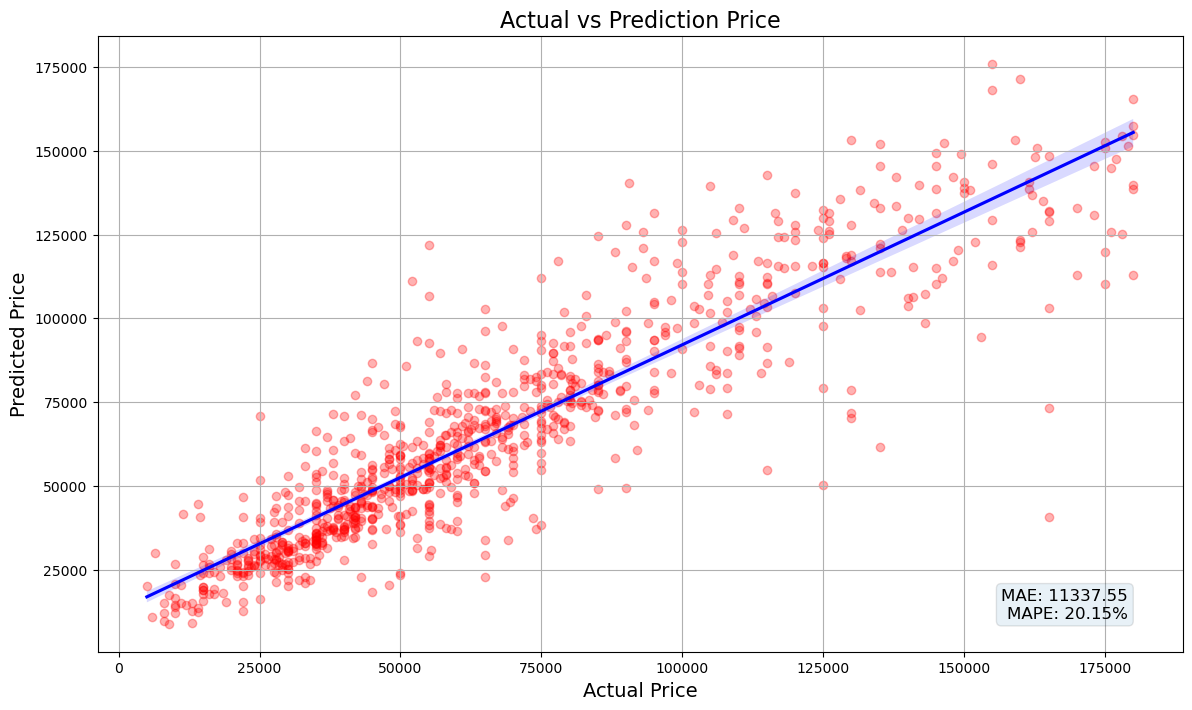

In [306]:
# Hitung evaluasi metrik
mae = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Scatter plot
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, scatter_kws={"color": "red", 'alpha': 0.3}, line_kws={'color': 'blue', 'alpha': 1})

# Tambahkan informasi evaluasi metrik ke plot
plt.text(0.95, 0.05, f'MAE: {mae:.2f}\nMAPE: {mape:.2%}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle='round', alpha=0.1))

plt.title('Actual vs Prediction Price', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.grid(True)

plt.show()


In [307]:
df_y_pred = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_xgb_tuning})
df_y_pred.reset_index(drop = True, inplace = True)
df_y_pred.sort_values('y_test').head(20)

df_y_pred4k = df_y_pred[df_y_pred['y_test']<=40000]
df_y_pred10k = df_y_pred[(df_y_pred['y_test']>4000) & (df_y_pred['y_test']<=10000)]
df_y_pred20k = df_y_pred[(df_y_pred['y_test']>10000) & (df_y_pred['y_test']<=20000)]
df_y_pred30k = df_y_pred[(df_y_pred['y_test']>20000) & (df_y_pred['y_test']<=30000)]
df_y_pred40k = df_y_pred[(df_y_pred['y_test']>30000) & (df_y_pred['y_test']<=40000)]
df_y_pred50k = df_y_pred[(df_y_pred['y_test']>40000) & (df_y_pred['y_test']<=50000)]
df_y_pred100k = df_y_pred[(df_y_pred['y_test']>50000) & (df_y_pred['y_test']<=100000)]
df_y_pred150k = df_y_pred[(df_y_pred['y_test']>100000) & (df_y_pred['y_test']<=150000)]
df_y_pred200k = df_y_pred[(df_y_pred['y_test']>150000) & (df_y_pred['y_test']<=200000)]
df_y_predmax = df_y_pred[(df_y_pred['y_test']>450000)]


list_range = [df_y_pred4k,
              df_y_pred10k,
              df_y_pred20k,
              df_y_pred30k,
              df_y_pred40k,
              df_y_pred50k,
              df_y_pred100k,
              df_y_pred150k,
              df_y_pred200k,
              df_y_predmax,
              df_y_pred]

list_range2 = ['<4k','4k-10' ,'10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-100k', '100k-150k', '150k-200k', '>150k (Max 185k)', 'All Range (Max 185k)']
list_mae = []
list_mape = []
list_len = []

for i in list_range:
    # Pengecekan apakah DataFrame tidak kosong
    if not i.empty:
        scoremae = mean_absolute_error(i['y_test'], i['y_test_pred'])
        scoremape = mean_absolute_percentage_error(i['y_test'], i['y_test_pred'])
        len_df = len(i)
        list_mae.append(scoremae)
        list_mape.append(scoremape * 100)
        list_len.append(len_df)
    else:
        # Jika DataFrame kosong, beri nilai default atau lakukan tindakan yang sesuai
        list_mae.append(np.nan)  # Gunakan np.nan untuk menandai nilai yang tidak valid
        list_mape.append(np.nan)
        list_len.append(0)

# Sesuaikan panjang list_range2 dengan yang terpendek di antara keempat list
min_length = min(len(list_range2), len(list_mae), len(list_mape), len(list_len))
list_range2 = list_range2[:min_length]
list_mae = list_mae[:min_length]
list_mape = list_mape[:min_length]
list_len = list_len[:min_length]

# Buat DataFrame
range_metrics = pd.DataFrame({
    "Range Price (SAR)": list_range2,
    "Score MAE (SAR)": list_mae,
    "Score MAPE (%)": list_mape,
    "Jumlah Data": list_len
})
range_metrics


,Range Price (SAR),Score MAE (SAR),Score MAPE (%),Jumlah Data
0,<4k,6890.251056,30.283160,270
1,4k-10,7825.657506,103.356798,14
2,10k-20k,7603.091521,50.771722,39
3,20k-30k,6237.385752,24.281149,102
4,30k-40k,7113.692731,19.762466,115
5,40k-50k,8521.318632,18.603676,122
6,50k-100k,10831.286695,15.690711,368
7,100k-150k,15969.894028,12.969888,132
8,150k-200k,35150.117021,20.967480,47
9,>150k (Max 185k),NaN,NaN,0


**Insight:**

1. **Peningkatan Akurasi Prediksi setelah Tuning:**
   - Setelah dilakukan tuning pada model Extreme Gradient Boost, terjadi peningkatan yang signifikan dalam akurasi prediksi. MAE mengalami penurunan dari 11,644.74 menjadi 11,337.55, menunjukkan bahwa model yang diatur ulang memberikan prediksi dengan tingkat kesalahan yang lebih rendah pada data uji.
   - Selain itu, terjadi penurunan pada nilai MAPE dari 0.2080 menjadi 0.2015, menunjukkan tingkat kesalahan relatif yang lebih rendah dan prediksi yang lebih konsisten.
   - Perubahan yang paling signifikan terjadi pada RMSLE, yang turun dari 0.2783 menjadi 0.0731 setelah tuning. Hal ini menunjukkan kemampuan model yang telah diatur ulang dalam mengurangi kesalahan logaritmik prediksinya.

2. **Analisis Performa Model berdasarkan Rentang Harga:**
   - Berdasarkan data rentang harga mobil bekas, dapat dilihat bahwa model Extreme Gradient Boost memberikan prediksi dengan tingkat kesalahan yang bervariasi tergantung pada rentang harga.
   - Rentang harga mobil bekas dengan harga di bawah 4k SAR cenderung memiliki tingkat kesalahan yang lebih tinggi, sedangkan rentang harga di atas 150k SAR memiliki tingkat kesalahan yang lebih rendah.
   - Rentang harga 100k-150k SAR memiliki MAE yang rendah sebesar 15,969.89 SAR dan MAPE sebesar 12.97%, menunjukkan kinerja yang relatif baik.
   - Namun, rentang harga 4k-10k SAR memiliki tingkat kesalahan yang sangat tinggi dengan MAE sebesar 7,825.66 SAR dan MAPE sebesar 103.36%.

**Kesimpulan:**

Dari hasil tuning yang berhasil, model Extreme Gradient Boost mampu meningkatkan akurasi prediksi secara keseluruhan. Meskipun demikian, performa model cenderung berbeda tergantung pada rentang harga mobil bekas. Rentang harga tertentu mungkin memerlukan penyesuaian atau pemilihan model yang lebih sesuai untuk meningkatkan akurasi prediksi. Evaluasi terus-menerus diperlukan untuk memastikan konsistensi performa dan identifikasi potensi perbaikan lebih lanjut.

In [308]:
mobil_bekas.describe()

,Year,Engine_Size,Mileage,Price
count,3127.000000,3127.000000,3127.000000,3127.000000
mean,2015.265430,3.042821,143704.576271,66049.022386
std,3.805647,1.359022,105072.069437,38707.426731
min,2000.000000,1.000000,1200.000000,4500.000000
25%,2014.000000,2.000000,70360.500000,37000.000000
50%,2016.000000,2.700000,119000.000000,57500.000000
75%,2018.000000,3.800000,198000.000000,85000.000000
max,2021.000000,6.400000,801500.000000,182000.000000


**Limitasi**

Limitasi pada model berdasarkan gambaran informasi fitur (Year, Engine_Size, Mileage) dan label (Price) yang diberikan adalah sebagai berikut:

Berdasarkan informasi tersebut, berikut adalah limitasi model yang direkomendasikan:

1. **Year (Tahun Produksi):**
   - Rentang nilai: 2000 - 2021.
   - Dapat dibatasi untuk mempertimbangkan mobil dengan tahun produksi antara kuartil pertama (Q1) dan kuartil ketiga (Q3), yaitu tahun 2014 - 2018.

2. **Engine_Size (Ukuran Mesin):**
   - Rentang nilai: 1.0 - 6.4.
   - Dapat dibatasi untuk mempertimbangkan mobil dengan ukuran mesin di antara kuartil pertama (Q1) dan kuartil ketiga (Q3), yaitu 2.0 - 3.8.

3. **Mileage (Jarak Tempuh):**
   - Rentang nilai: 1200 - 801500 km
   - Dapat dibatasi untuk mempertimbangkan mobil dengan jarak tempuh di antara kuartil pertama (Q1) dan kuartil ketiga (Q3), yaitu 70000- 198000 km.

4. **Price (Harga):**
   - Rentang nilai: 4,500 - 182,000 SAR.
   - Dapat dibatasi untuk mempertimbangkan mobil dengan harga tertentu, Berdasarkan SCORE MAE, MAPE, dan jumlah data, rentang harga yang paling cocok adalah rentang 20,000 - 150,000 SAR. Rentang ini mencakup sebagian besar data dengan jumlah yang cukup besar untuk memberikan representasi yang baik terhadap variasi harga mobil bekas. Selain itu, rentang ini juga memberikan rentang harga yang cukup luas untuk mencakup berbagai jenis mobil bekas tanpa terlalu mempersempit fokus model
   
Dengan melakukan limitasi pada fitur-fitur dan label tersebut, model dapat difokuskan pada rentang-nilai yang relevan dan lebih akurat dalam memprediksi harga mobil bekas. Setiap langkah limitasi memiliki rentang nilai yang jelas dan dapat diinterpretasikan dengan mudah, sehingga membantu meningkatkan kegunaan model dalam praktiknya.

-------------------------------------------------------------------------------------------

**Feature Importances**
|
Untuk melakukan seleksi terhadap fitur-fitur yang memang penting atau berpengaruh terhadap target variabel

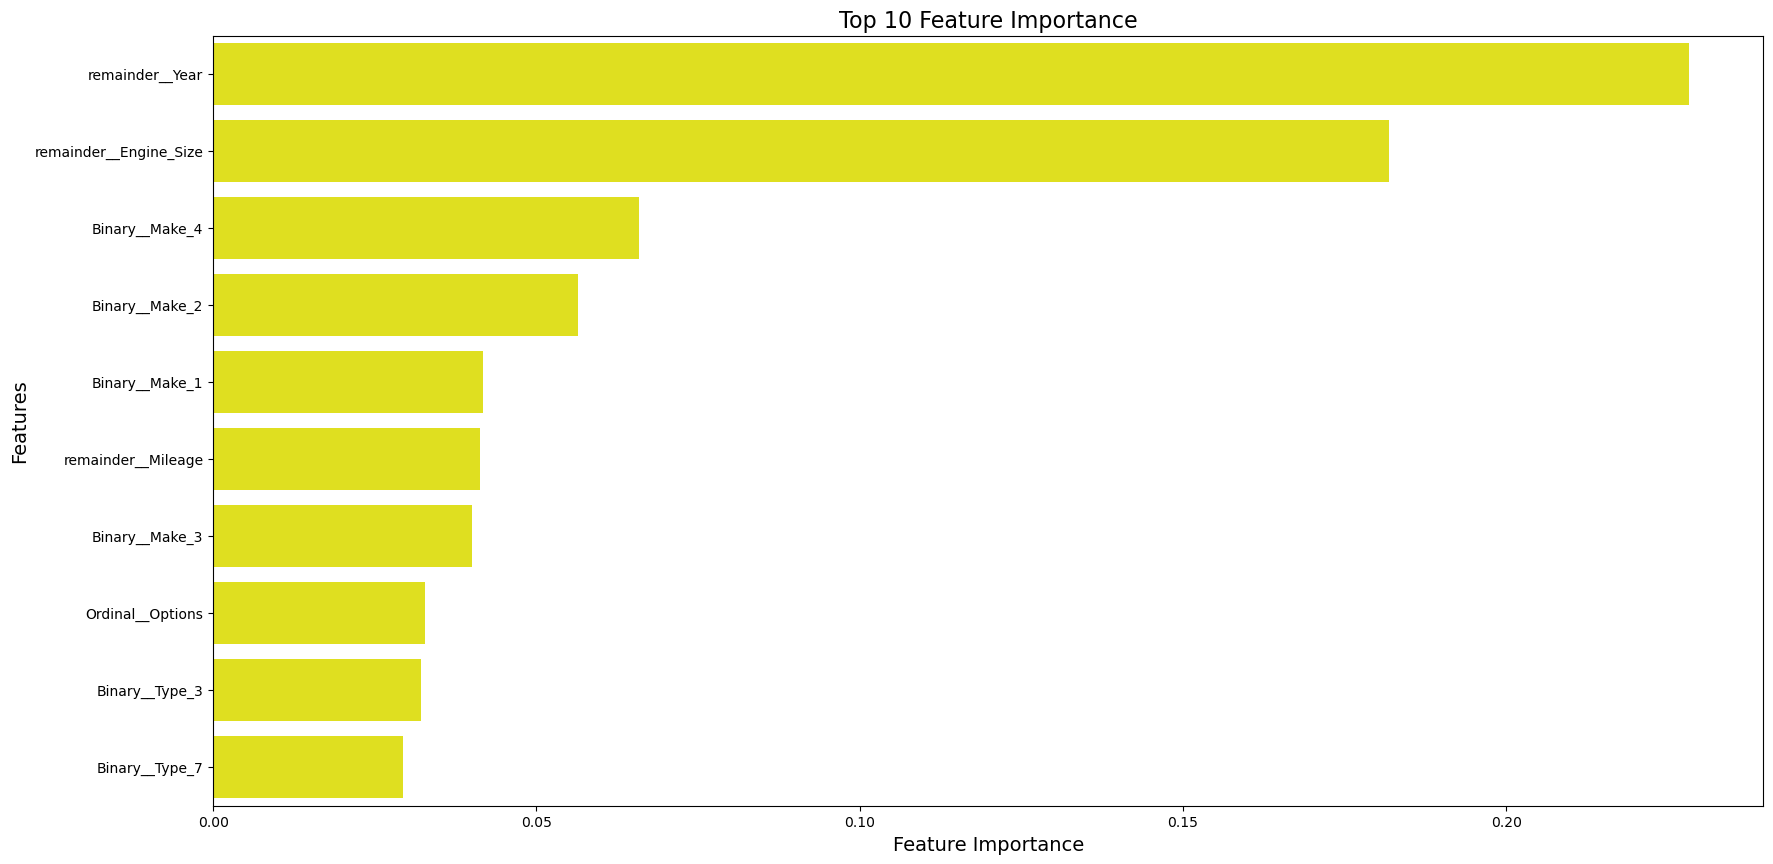

In [309]:
# Access the XGBoost model within the TransformedTargetRegressor
xgb_model = xgb_tuning.regressor_.named_steps['model']

# Assuming that 'ctrans' is a transformer that you have applied to the features
feature_names = ctrans.get_feature_names_out()

feature_imp = pd.DataFrame({"Features": feature_names, "Value": xgb_model.feature_importances_}).sort_values("Value", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(20, 10))
sns.barplot(data=feature_imp, x="Value", y="Features", color='yellow')
plt.title('Top 10 Feature Importance', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


Berdasarkan plot diatas, terlihat bahwa feature 'Engine_Size' dan 'Year' merupakan feature dengan pengaruh paling tinggi dari harga penjualan mobil bekas di Saudi Arabia.

### **Kesimpulan**

- Model Extreme Gradient Boost telah mengalami peningkatan yang signifikan dalam akurasi prediksi setelah dilakukan tuning. Terjadi penurunan yang signifikan pada Mean Absolute Error (MAE) dari 11,644.74 menjadi 11,337.55, serta pada Mean Absolute Percentage Error (MAPE) dari 0.2080 menjadi 0.2015. Hal ini menunjukkan bahwa model yang diatur ulang memberikan prediksi dengan tingkat kesalahan yang lebih rendah dan lebih konsisten. Perubahan yang paling signifikan terjadi pada Root Mean Squared Logarithmic Error (RMSLE), yang turun dari 0.2783 menjadi 0.0731 setelah tuning, menunjukkan kemampuan model dalam mengurangi kesalahan logaritmik prediksinya. Dalam rentang nilai yang telah dilatih, perkiraan harga rata-ratanya akan memiliki selisih sekitar 20.15% dari harga yang sebenarnya, seperti terlihat dari MAPE dan MAE.

- Fitur yang memiliki pengaruh paling signifikan pada model ini adalah Engine Size dan Year 

- Analisis performa model berdasarkan rentang harga menunjukkan bahwa performa model cenderung bervariasi tergantung pada rentang harga mobil bekas. Rentang harga tertentu mungkin memerlukan penyesuaian atau pemilihan model yang lebih sesuai untuk meningkatkan akurasi prediksi. Evaluasi terus-menerus diperlukan untuk memastikan konsistensi performa dan identifikasi potensi perbaikan lebih lanjut.

- Model ini kurang cocok untuk mobil dengan harga sangat rendah (<4k SAR) dan sangat tinggi (>150k SAR), seperti yang terlihat dari hasil tabel prediksi rentang harga. Hal ini menunjukkan bahwa model ini lebih baik digunakan untuk memprediksi harga mobil bekas dalam rentang harga yang lebih moderat.

### **Rekomendasi**

Rekomendasi Bisnis:

1. Fokuskan strategi penjualan pada mobil bekas dengan harga moderat, karena model ini kurang cocok untuk memprediksi harga mobil dengan harga sangat rendah (<4k SAR) dan sangat tinggi (>150k SAR). Ini dapat dilakukan dengan memperkuat promosi dan penjualan untuk mobil bekas dengan rentang harga yang sesuai dengan kemampuan model, yaitu dalam rentang harga yang lebih moderat.
2. Gunakan hasil analisis performa model berdasarkan rentang harga untuk menyesuaikan strategi penjualan dan promosi, serta untuk mengidentifikasi peluang pasar yang lebih potensial. Misalnya, jika model menunjukkan performa yang lebih baik pada mobil bekas dengan harga 100k-150k SAR, maka fokuskan upaya pemasaran pada rentang harga ini untuk meningkatkan konversi penjualan.
3. Tingkatkan layanan pelanggan dengan menyediakan informasi yang lebih rinci tentang proses pembelian, garansi, dan layanan purna jual. Hal ini dapat membantu meningkatkan kepercayaan pelanggan dan memperkuat hubungan jangka panjang dengan mereka.
4. Manfaatkan teknologi digital seperti aplikasi seluler atau platform online untuk memperluas jangkauan dan kenyamanan pelanggan. Ini juga dapat membantu dalam mengumpulkan data pelanggan yang lebih rinci untuk analisis lebih lanjut.

Rekomendasi Pengembangan Model:

1. Lanjutkan tuning model untuk meningkatkan akurasi prediksi, terutama pada rentang harga yang kurang sesuai dengan model saat ini. Misalnya, jika model kurang akurat dalam memprediksi harga mobil dengan harga sangat rendah atau sangat tinggi, maka lakukan tuning lebih lanjut untuk meningkatkan performa pada rentang harga ini.
2. Evaluasi kembali fitur-fitur yang memiliki pengaruh paling signifikan pada model, yaitu Engine Size dan Year, untuk memastikan bahwa mereka masih relevan dan memberikan kontribusi yang optimal terhadap prediksi harga mobil bekas. Jika diperlukan, tambahkan fitur-fitur baru yang dapat meningkatkan akurasi prediksi, seperti riwayat perawatan atau informasi kecelakaan.
3. Pertimbangkan untuk menambahkan fitur-fitur baru atau menghapus fitur yang kurang relevan untuk meningkatkan akurasi prediksi dan konsistensi performa model. Misalnya, jika fitur-fitur yang kurang relevan mengganggu performa model, maka pertimbangkan untuk menghapusnya atau menggantinya dengan fitur yang lebih relevan.
4. Pertimbangkan untuk menggunakan metode pemodelan yang lebih kompleks seperti ensemble learning atau neural networks jika diperlukan.

### Save Model

In [312]:
import pickle

xgb_tuning = TransformedTargetRegressor(gs.best_estimator_, func=np.log, inverse_func=np.exp)
xgb_tuning.fit(X_train, y_train)
pickle.dump(xgb_tuning, open('Model_Capstone3_SaudiUsedCard_Sukmagubali.sav', 'wb'))


### Load Model

In [313]:
filename = 'Model_Capstone3_SaudiUsedCard_Sukmagubali.sav'
loaded_model = pickle.load(open(filename, 'rb'))

print("MAE Score:", mean_absolute_error(y_test, loaded_model.predict(X_test)))
print("MAPE Score:", mean_absolute_percentage_error(y_test, loaded_model.predict(X_test))*100,"%")


MAE Score: 11337.554498219515
MAPE Score: 20.14673065861619 %
